<a href="https://colab.research.google.com/github/jeans-all/ECommerce_Fraud_Analysis/blob/main/ecommerce_fraud_detection_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 E-commerce Fraud Detection Analysis

## 🎯 Project Overview

### Background
E-commerce fraud costs businesses billions annually and damages customer trust. This project analyzes transaction patterns to identify key fraud indicators and develop actionable insights for fraud prevention strategies.

### Objectives
1. **Identify fraud patterns** across transaction amounts, channels, and user behaviors
2. **Evaluate security feature effectiveness** (AVS, CVV, 3DS)
3. **Develop risk profiles** for different transaction types
4. **Provide actionable recommendations** for fraud prevention

### Dataset Description
- **Source**: E-commerce transaction data (simulated) from [<i>Keggle</i>](https://www.kaggle.com/datasets/umuttuygurr/e-commerce-fraud-detection-dataset/data)
- **Period**: January - October 2024 (10 months)
- **Size**: 299,695 transactions
- **Features**: 17 variables including:
  - Transaction details (amount, time, merchant category)
  - User information (account age, transaction history)
  - Security features (AVS, CVV, 3DS flags)
  - Geographic data (country, cross-border indicators)
  - Target variable: is_fraud (binary)

### Key Questions
- Which transaction characteristics indicate higher fraud risk?
- How effective are current security measures?
- Are certain channels or merchant categories more vulnerable?
- Do user behavior patterns predict fraud likelihood?

---

## 📑 Table of Contents

1. **[Setup & Data Loading](#setup)**
   - Library imports and configurations
   - Data loading and initial inspection

2. **[Data Quality Assessment](#quality)**
   - Missing value analysis
   - Data type validation
   - Temporal coverage check

3. **[Exploratory Data Analysis (EDA)](#amount)**
   - Amount distribution by fraud status
   - High-risk amount identification
   - Outlier analysis

4. **[Channel & Security Analysis](#security)**
   - Channel fraud rates
   - Security feature effectiveness
   - Combined security impact

5. **[Security Features Analysis](#feature)**
   - Individual security feature effectiveness (AVS, CVV, 3DS)
   - Combined security score impact
   - Channel-security relationship analysis

6. **[Geographic Patterns](#geographic)**
   - Country-level fraud analysis
   - Cross-border transaction risks
   - High-risk region identification

7. **[User Behavior Analysis](#user)**
   - Account age impact
   - Activity level correlation
   - Promo code usage patterns

8. **[Conclusion](#findings)**
   - Analysis Review
   - Insights & Business recommendations
   - Future research opportunities
   - Conclusion
---

## 💻 Technical Approach

This analysis leverages **Python** and **Pandas** for data manipulation, with a focus on:
- Exploratory Data Analysis (EDA)
- Statistical analysis
- Risk segmentation
- Business-oriented insights



<a name="setup"></a>

## 1. Setup & Data Loading

### Import Required Libraries



In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

Once libraries are imported, data needs loading into Python kernel using <i>pandas.read_csv</i> function.

I directly connected dataset on my Google Drive directly through Google Colab library.

So set up the connection using colab library as follows:

In [2]:
# @title
from google.colab import drive
drive.mount('/content/drive')

try:
  !mkdir -p "/content/drive/MyDrive/data_projects/ecommerce_fraud_detection/data"
  !mkdir -p "/content/drive/MyDrive/data_projects/ecommerce_fraud_detection/notebooks"
  !mkdir -p "/content/drive/MyDrive/data_projects/ecommerce_fraud_detection/outputs"
except Error:
  print("Directories already exist")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Finish basic settings for libraries to be used. This includes image size to be displayed in Jupyter Notebook.

In [3]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
plt.rcParams['figure.figsize'] = (12, 6)
sns.set_palette('husl')
sns.set_style('whitegrid')

Now load the dataset from the configured Google Drive directory using <i>read_csv</i> function.

In [4]:

# Read CSV file from the mounted drive
df = pd.read_csv('/content/drive/My Drive/data_projects/ecommerce_fraud_detection/data/transactions.csv')


Check if the dataset is loaded successfully and have a look into it.

In [5]:
# @title
# Test data load
print(f"Dataset Shape: {df.shape}")
print(f'Columns: {df.dtypes}')
print("\n📊 First Row:")
print(df.head(1))

Dataset Shape: (299695, 17)
Columns: transaction_id               int64
user_id                      int64
account_age_days             int64
total_transactions_user      int64
avg_amount_user            float64
amount                     float64
country                     object
bin_country                 object
channel                     object
merchant_category           object
promo_used                   int64
avs_match                    int64
cvv_result                   int64
three_ds_flag                int64
transaction_time            object
shipping_distance_km       float64
is_fraud                     int64
dtype: object

📊 First Row:
   transaction_id  user_id  account_age_days  total_transactions_user  \
0               1        1               141                       47   

   avg_amount_user  amount country bin_country channel merchant_category  \
0           147.93   84.75      FR          FR     web            travel   

   promo_used  avs_match  cvv_result  th

---
<a name="quality"></a>
## 2. Data Quality Assessment

Before any analysis, we must ensure data integrity. This section validates data quality and identifies potential issues.


- Are there any missing values? Where and how many?
- Are there duplicate transactions?
- What is the overall fraud rate in our dataset?
- What is the time range of our transaction data?
- and more

**Deliverables:**
1. Missing value analysis (count + percentage)
2. Duplicate check
3. Fraud rate calculation
4. Transaction date range

---


In [6]:
# @title
# 1. Missing Values Analysis

print("="*50)
print("📌 MISSING VALUES ANALYSIS")
print("="*50)

# Calculate missing values with percentages
missing_data = pd.DataFrame({
  'Missing_Count': df.isnull().sum(),
  'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})

na_count = missing_data[missing_data['Missing_Count'] > 0]['Missing_Count']
if na_count.sum() == 0:
  print(f"\n✅ No missing values in the dataset")
else:
  print(f"\n❌ Missing values found in the dataset")
  print(na_count)

# 2. Duplicate Check

print("\n" + "="*50)
print("📌 DUPLICATE ANALYSIS")
print("="*50)

# Check for duplicate transactions
duplicate_count = df.duplicated().sum()
duplicate_transactions = df[df.duplicated(subset=['transaction_id'], keep=False)]

if duplicate_count == 0:
  print(f"\n✅ No duplicate row in the dataset")
else:
  print(f"\nTotal duplicate rows: {duplicate_count}")
  print(f"Duplicate transaction IDs: {len(duplicate_transactions)}")

# 3. Date Range Analysis
print("\n" + "="*50)
print("📌 TEMPORAL COVERAGE")
print("="*50)

# Convert to datetime for proper analysis
df['transaction_datetime'] = pd.to_datetime(df['transaction_time'])
date_range = df['transaction_datetime'].agg(['min', 'max'])
days_covered = (date_range['max'] - date_range['min']).days

print(f"Start Date: {date_range['min'].strftime('%Y-%m-%d')}")
print(f"End Date: {date_range['max'].strftime('%Y-%m-%d')}")
print(f"Total Days Covered: {days_covered} days (~{days_covered/30:.1f} months)")

# 4. Fraud Rate Analysis
print("\n" + "="*50)
print("📌 FRAUD RATE ANALYSIS")
print("="*50)

fraud_summary = df['is_fraud'].value_counts()
fraud_rate = (fraud_summary[1] / len(df)) * 100
print(f"Total Transactions: {len(df):,}")
print(f"Fraudulent Transactions: {fraud_summary[1]:,}")
print(f"Legitimate Transactions: {fraud_summary[0]:,}")
print(f"Overal Fraud Rate: {fraud_rate:.2f}%")

# 5. Data Overview
print("\n" + "="*50)
print("📌 DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumn Types:")
print(df.dtypes.value_counts())




📌 MISSING VALUES ANALYSIS

✅ No missing values in the dataset

📌 DUPLICATE ANALYSIS

✅ No duplicate row in the dataset

📌 TEMPORAL COVERAGE
Start Date: 2024-01-01
End Date: 2024-10-31
Total Days Covered: 304 days (~10.1 months)

📌 FRAUD RATE ANALYSIS
Total Transactions: 299,695
Fraudulent Transactions: 6,612
Legitimate Transactions: 293,083
Overal Fraud Rate: 2.21%

📌 DATASET OVERVIEW
Shape: 299,695 rows × 18 columns

Column Types:
int64                  9
object                 5
float64                3
datetime64[ns, UTC]    1
Name: count, dtype: int64


### 💡 Key Findings

1. **Data Completeness**: ✅ No missing values - excellent data quality
2. **Fraud Rate**: 2.21% fraudulent transactions - typical for e-commerce
3. **Temporal Coverage**: 10 months of data (Jan-Oct 2024)
4. **No Duplicates**: Each transaction is unique



---
<a name="amount"></a>

## 3. Exploratory Data Analysis (EDA)

**Business Question:** At what transaction amounts does fraud risk increase?


1. **Amount Range Segmentation:**
   - Create transaction amount bins: \$0-50, \$50-100, \$100-200, \$200-500, \$500-1000, \$1000+
   - For each bin, calculate:
     - Total transaction count
     - Fraud transaction count  
     - Fraud rate (%) within the current bin
     - Average transaction amount in that bin

2. **High-Risk Amount Identification:**
   - Find the amount bin with the highest fraud rate
   - Calculate what percentage of all frauds occur in transactions above \$500
   - Compare average amount for fraud vs legitimate transactions

3. **Outlier Analysis:**
   - Find the top 10 highest transaction amounts
   - Check how many of these are fraudulent
   - Calculate the 95th percentile amount for both fraud and legitimate transactions


---


In [7]:
# @title
# 1
bins = [0, 50, 100, 200, 250, 1000, np.inf]
df['transaction_category'] = pd.cut(df['amount'], bins=bins)
metric = {
    'transaction_id' : 'count',
    'is_fraud': ['sum', lambda x: round(x.sum()/x.count() * 100, 2)],
    'amount' : 'mean'
}

segment_analysis = df.groupby('transaction_category', observed=True).agg(metric)
segment_analysis.columns = ['transaction_count', 'fraud_count', 'fraud_rate', 'avg_transaction_amount']
segment_analysis = segment_analysis.sort_values(by='fraud_rate', ascending=False)
segment_analysis['transaction_percentage'] = round(segment_analysis['transaction_count']/df['transaction_id'].count(), 2)
# print(segment_analysis)

print("="*60)
print("🎯 AMOUNT RANGE SEGMENTATION ")
print("="*60)
print(segment_analysis.reset_index().to_string(index=False))


# 2
worst_bin = segment_analysis[segment_analysis['fraud_rate']==segment_analysis['fraud_rate'].max()]

fraud_above_500 = df[df['amount'] > 500]['is_fraud'].sum()/df['is_fraud'].sum()

avg_fraud_amount = df[df['is_fraud'] == 1]['amount'].mean()
avg_legit_amount =df[df['is_fraud'] == 0]['amount'].mean()

print("\n"+"="*60)
print("🎯 HIGH-RISK AMOUNT IDENTIFICATION")
print("="*60)

print("1️⃣ Highest Risk Amount Bin:")
print(worst_bin.to_string(index=False))

print(f"\n2️⃣ Fraud Concentration:")
print(f"Percentage of all frauds above $500: {fraud_above_500*100:.2f}%")

print(f"\n3️⃣ Average Transaction Amount Comparison:")
print(f"   Fraudulent transactions: ${avg_fraud_amount:.2f}")
print(f"   Legitimate transactions: ${avg_legit_amount:.2f}")
print(f"   Difference: ${avg_fraud_amount - avg_legit_amount:.2f}")

# 3

# Get top 10 transactions
topTenTnx = df.nlargest(10, "amount")

# Count frauds in top 10
fraudTopTen = topTenTnx['is_fraud'].sum()
legitTopTen = 10-fraudTopTen

# Get 95th percentiles
legitTop95 = np.percentile(df[df["is_fraud"]==0]["amount"], 95)
fraudTop95 = np.percentile(df[df["is_fraud"]==1]["amount"], 95)

print("\n"+"="*60)
print("📊 OUTLIER ANALYSIS RESULTS")
print("="*60)
print(f"\n1️⃣ Top 10 Highest Transactions:")
print(f"   Fraudulent: {fraudTopTen}")
print(f"   Legitimate: {legitTopTen}")

print(f"\n2️⃣ 95th Percentile Amounts:")
print(f"   Legitimate transactions: ${legitTop95:.2f}")
print(f"   Fraudulent transactions: ${fraudTop95:.2f}")
print(f"   Fraud premium: {(fraudTop95/legitTop95 - 1)*100:.1f}%")

print("\n3️⃣ Top 10 Transaction Details:")
print(topTenTnx[['transaction_id', 'amount', 'is_fraud', 'merchant_category']].to_string(index=False))

🎯 AMOUNT RANGE SEGMENTATION 
transaction_category  transaction_count  fraud_count  fraud_rate  avg_transaction_amount  transaction_percentage
       (1000.0, inf]               6258         1710       27.33             1745.553266                    0.02
         (0.0, 50.0]              89996         2339        2.60               27.764453                    0.30
       (50.0, 100.0]              71113          923        1.30               72.746364                    0.24
      (200.0, 250.0]              16772          214        1.28              223.293243                    0.06
      (100.0, 200.0]              67395          850        1.26              142.141500                    0.22
     (250.0, 1000.0]              48161          576        1.20              439.676777                    0.16

🎯 HIGH-RISK AMOUNT IDENTIFICATION
1️⃣ Highest Risk Amount Bin:
 transaction_count  fraud_count  fraud_rate  avg_transaction_amount  transaction_percentage
              6258      

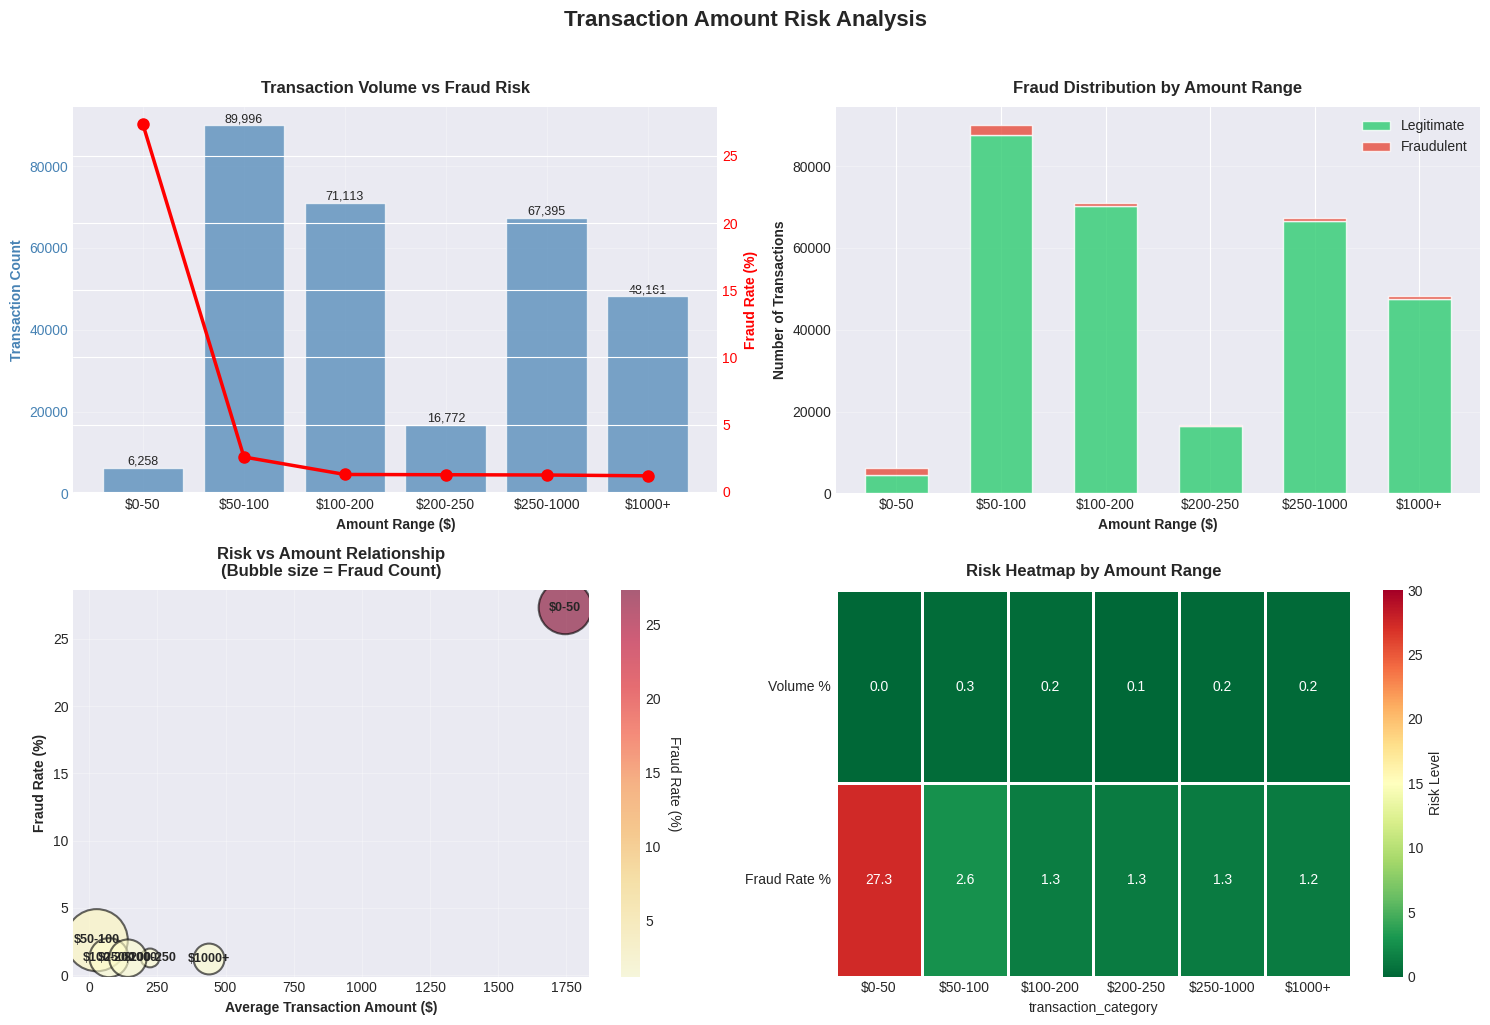

In [8]:
# @title

# Set style for professional appearance
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

# Create figure with subplots
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Transaction Amount Risk Analysis', fontsize=16, fontweight='bold', y=1.02)

# 1. DUAL-AXIS: Transaction Volume vs Fraud Rate
# ax1 = axes[0, 0]
ax1_twin = ax1.twinx()

# Bar chart for transaction counts
bars = ax1.bar(range(len(segment_analysis)),
               segment_analysis['transaction_count'],
               alpha=0.7, color='steelblue', label='Transaction Count')

# Line chart for fraud rate
line = ax1_twin.plot(range(len(segment_analysis)),
                     segment_analysis['fraud_rate'],
                     color='red', marker='o', linewidth=2.5,
                     markersize=8, label='Fraud Rate (%)')

# Formatting
ax1.set_xlabel('Amount Range ($)', fontweight='bold')
ax1.set_ylabel('Transaction Count', color='steelblue', fontweight='bold')
ax1_twin.set_ylabel('Fraud Rate (%)', color='red', fontweight='bold')
ax1.set_title('Transaction Volume vs Fraud Risk', fontweight='bold', pad=10)
ax1.set_xticks(range(len(segment_analysis)))
ax1.set_xticklabels(['$0-50', '$50-100', '$100-200', '$200-250', '$250-1000', '$1000+'], rotation=0)
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1_twin.tick_params(axis='y', labelcolor='red')
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height):,}', ha='center', va='bottom', fontsize=9)

# 2. STACKED BAR: Fraud vs Legitimate Composition

# Calculate legitimate transactions
segment_analysis['legit_count'] = segment_analysis['transaction_count'] - segment_analysis['fraud_count']

# Create stacked bar
width = 0.6
x_pos = np.arange(len(segment_analysis))
p1 = ax2.bar(x_pos, segment_analysis['legit_count'], width,
             label='Legitimate', color='#2ecc71', alpha=0.8)
p2 = ax2.bar(x_pos, segment_analysis['fraud_count'], width,
             bottom=segment_analysis['legit_count'],
             label='Fraudulent', color='#e74c3c', alpha=0.8)

ax2.set_xlabel('Amount Range ($)', fontweight='bold')
ax2.set_ylabel('Number of Transactions', fontweight='bold')
ax2.set_title('Fraud Distribution by Amount Range', fontweight='bold', pad=10)
ax2.set_xticks(x_pos)
ax2.set_xticklabels(['$0-50', '$50-100', '$100-200', '$200-250', '$250-1000', '$1000+'], rotation=0)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3, axis='y')

# 3. BUBBLE CHART: Multi-dimensional View

# Bubble sizes based on fraud count
bubble_sizes = segment_analysis['fraud_count'] / segment_analysis['fraud_count'].max() * 2000

scatter = ax3.scatter(segment_analysis['avg_transaction_amount'],
                     segment_analysis['fraud_rate'],
                     s=bubble_sizes,
                     c=segment_analysis['fraud_rate'],
                     cmap='YlOrRd',
                     alpha=0.6,
                     edgecolors='black',
                     linewidth=1.5)

# Add labels for each bubble
labels = ['$0-50', '$50-100', '$100-200', '$200-250', '$250-1000', '$1000+']
for i, label in enumerate(labels):
    ax3.annotate(label,
                (segment_analysis['avg_transaction_amount'].iloc[i],
                 segment_analysis['fraud_rate'].iloc[i]),
                ha='center', va='center', fontsize=9, fontweight='bold')

ax3.set_xlabel('Average Transaction Amount ($)', fontweight='bold')
ax3.set_ylabel('Fraud Rate (%)', fontweight='bold')
ax3.set_title('Risk vs Amount Relationship\n(Bubble size = Fraud Count)', fontweight='bold', pad=10)
ax3.grid(True, alpha=0.3)

# Add colorbar
cbar = plt.colorbar(scatter, ax=ax3)
cbar.set_label('Fraud Rate (%)', rotation=270, labelpad=15)

# 4. HEATMAP STYLE: Risk Matrix

# Create data for heatmap
heatmap_data = segment_analysis[['transaction_percentage', 'fraud_rate']].T
heatmap_data.index = ['Volume %', 'Fraud Rate %']

# Create heatmap
sns.heatmap(heatmap_data,
            annot=True,
            fmt='.1f',
            cmap='RdYlGn_r',
            cbar_kws={'label': 'Risk Level'},
            ax=ax4,
            vmin=0,
            vmax=30,
            linewidths=1,
            linecolor='white')

ax4.set_title('Risk Heatmap by Amount Range', fontweight='bold', pad=10)
ax4.set_xticklabels(['$0-50', '$50-100', '$100-200', '$200-250', '$250-1000', '$1000+'], rotation=0)
ax4.set_yticklabels(ax4.get_yticklabels(), rotation=0)

plt.tight_layout()
plt.show()



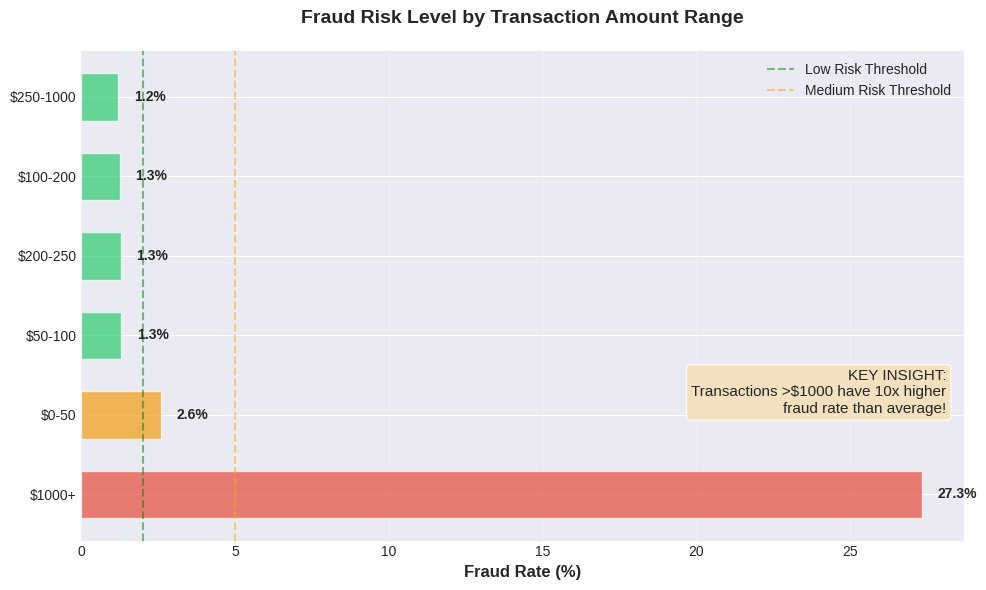

In [9]:
# @title
# Additional insight visualization - Risk Score Card
fig2, ax = plt.subplots(1, 1, figsize=(10, 6))

# Create risk categories
segment_analysis['risk_category'] = pd.cut(segment_analysis['fraud_rate'],
                                           bins=[0, 2, 5, 100],
                                           labels=['Low Risk', 'Medium Risk', 'High Risk'])

colors = {'Low Risk': '#2ecc71', 'Medium Risk': '#f39c12', 'High Risk': '#e74c3c'}

for idx, row in segment_analysis.reset_index().iterrows():
    risk = row['risk_category']
    ax.barh(idx, row['fraud_rate'],
           color=colors[risk], alpha=0.7,
           height=0.6)
    # Add percentage text
    ax.text(row['fraud_rate'] + 0.5, idx,
           f"{row['fraud_rate']:.1f}%",
           va='center', fontweight='bold')

ax.set_yticks(range(len(segment_analysis)))
ax.set_yticklabels(['$1000+', '$0-50', '$50-100', '$200-250', '$100-200', '$250-1000'])
ax.set_xlabel('Fraud Rate (%)', fontweight='bold', fontsize=12)
ax.set_title('Fraud Risk Level by Transaction Amount Range', fontweight='bold', fontsize=14, pad=20)
ax.grid(True, alpha=0.3, axis='x')

# Add vertical lines for risk thresholds
ax.axvline(x=2, color='green', linestyle='--', alpha=0.5, label='Low Risk Threshold')
ax.axvline(x=5, color='orange', linestyle='--', alpha=0.5, label='Medium Risk Threshold')
ax.legend(loc='upper right')

# Add text box with key insight
textstr = 'KEY INSIGHT:\nTransactions >$1000 have 10x higher\nfraud rate than average!'
props = dict(boxstyle='round', facecolor='wheat', alpha=0.8)
ax.text(0.98, 0.35, textstr, transform=ax.transAxes, fontsize=11,
        verticalalignment='top', horizontalalignment='right', bbox=props)

plt.tight_layout()
plt.show()

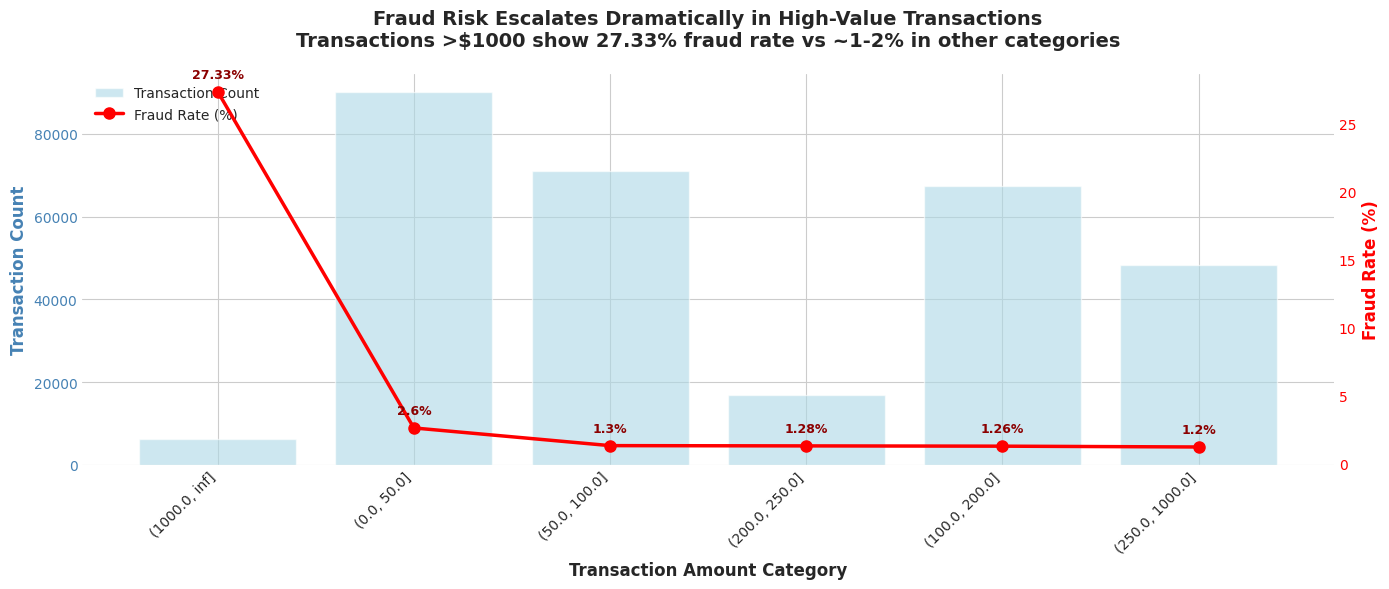

In [10]:
# @title
# Set style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 6)

# Prepare data
plot_data = segment_analysis.reset_index()
plot_data['category_label'] = plot_data['transaction_category'].astype(str)

# Create figure with dual y-axes
fig, ax1 = plt.subplots()

# Bar plot for transaction count
x_pos = range(len(plot_data))
bars = ax1.bar(x_pos, plot_data['transaction_count'],
               alpha=0.6, color='lightblue', label='Transaction Count')
ax1.set_xlabel('Transaction Amount Category', fontsize=12, fontweight='bold')
ax1.set_ylabel('Transaction Count', fontsize=12, fontweight='bold', color='steelblue')
ax1.tick_params(axis='y', labelcolor='steelblue')
ax1.set_xticks(x_pos)
ax1.set_xticklabels(plot_data['category_label'], rotation=45, ha='right')

# Line plot for fraud rate on secondary axis
ax2 = ax1.twinx()
line = ax2.plot(x_pos, plot_data['fraud_rate'],
                color='red', marker='o', linewidth=2.5,
                markersize=8, label='Fraud Rate (%)')
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Add fraud rate labels on points
for i, (x, y) in enumerate(zip(x_pos, plot_data['fraud_rate'])):
    ax2.annotate(f'{y}%',
                xy=(x, y),
                xytext=(0, 10),
                textcoords='offset points',
                ha='center',
                fontsize=9,
                fontweight='bold',
                color='darkred')

# Title and legend
plt.title('Fraud Risk Escalates Dramatically in High-Value Transactions\n' +
          'Transactions >$1000 show 27.33% fraud rate vs ~1-2% in other categories',
          fontsize=14, fontweight='bold', pad=20)

# Combine legends
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper left', framealpha=0.9)
ax2.grid(False)
plt.tight_layout()
plt.show()

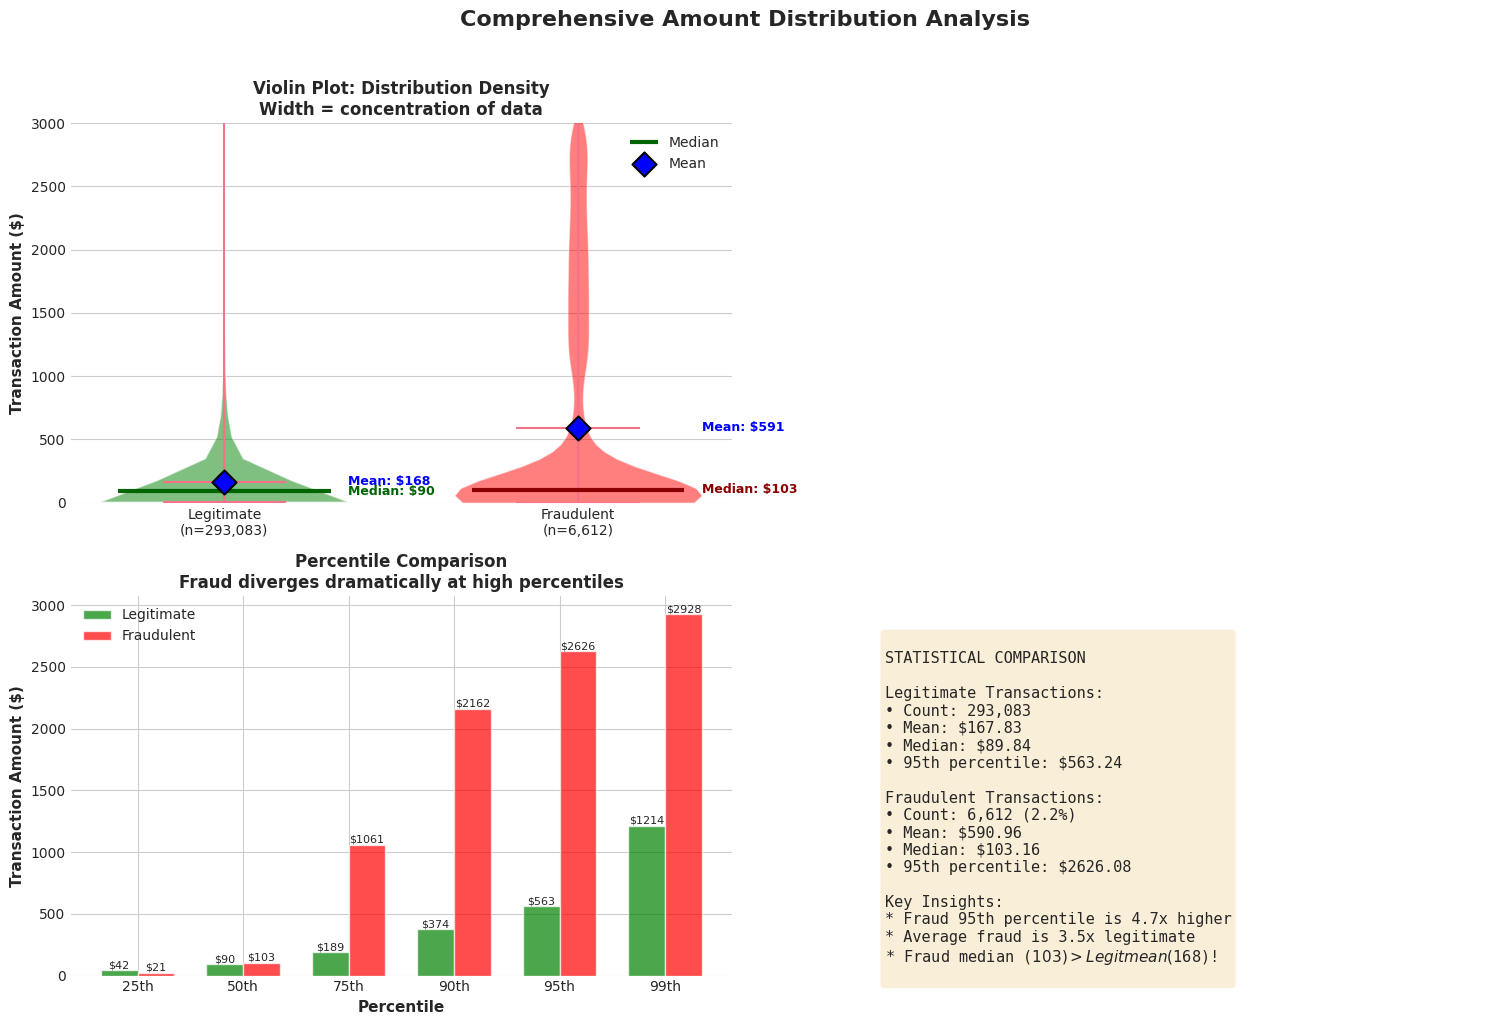

In [11]:
# @title
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Get data
fraud_amounts = df[df['is_fraud'] == 1]['amount']
legit_amounts = df[df['is_fraud'] == 0]['amount']

# ========== IMPROVED VIOLIN PLOT ==========
ax1 = axes[0, 0]

# Create violin plot
parts = ax1.violinplot([legit_amounts, fraud_amounts],
                        positions=[1, 2],
                        showmeans=True,      # We'll add mean manually
                        showmedians=False,    # We'll add median manually
                        showextrema=True,    # Remove quartile lines for clarity
                        widths=0.7)

# Color the violins
colors = ['green', 'red']
for pc, color in zip(parts['bodies'], colors):
    pc.set_facecolor(color)
    pc.set_alpha(0.5)

# Manually add median lines (THICK and LABELED)
legit_median = legit_amounts.median()
fraud_median = fraud_amounts.median()

ax1.hlines(legit_median, 0.7, 1.3, colors='darkgreen', linewidth=3, label='Median')
ax1.hlines(fraud_median, 1.7, 2.3, colors='darkred', linewidth=3)

# Manually add mean markers (VISIBLE and LABELED)
ax1.scatter([1], [avg_legit_amount], color='blue', s=150,
           marker='D', zorder=3, label='Mean', edgecolors='black', linewidth=1.5)
ax1.scatter([2], [avg_fraud_amount], color='blue', s=150,
           marker='D', zorder=3, edgecolors='black', linewidth=1.5)

# Add text annotations
ax1.text(1.35, legit_median, f'Median: ${legit_median:.0f}',
        fontsize=9, va='center', color='darkgreen', fontweight='bold')
ax1.text(2.35, fraud_median, f'Median: ${fraud_median:.0f}',
        fontsize=9, va='center', color='darkred', fontweight='bold')

ax1.text(1.35, avg_legit_amount, f'Mean: ${avg_legit_amount:.0f}',
        fontsize=9, va='center', color='blue', fontweight='bold')
ax1.text(2.35, avg_fraud_amount, f'Mean: ${avg_fraud_amount:.0f}',
        fontsize=9, va='center', color='blue', fontweight='bold')

ax1.set_xticks([1, 2])
ax1.set_xticklabels([f'Legitimate\n(n={len(legit_amounts):,})',
                     f'Fraudulent\n(n={len(fraud_amounts):,})'])
ax1.set_ylabel('Transaction Amount ($)', fontsize=11, fontweight='bold')
ax1.set_title('Violin Plot: Distribution Density\nWidth = concentration of data',
              fontsize=12, fontweight='bold')
ax1.set_ylim(0, 3000)
ax1.legend(loc='upper right')

# ========== Top Right: Sample comparison ==========
ax2 = axes[0, 1]
ax2.remove()

# ========== Bottom Left: Percentile comparison ==========
ax3 = axes[1, 0]
percentiles = [25, 50, 75, 90, 95, 99]
legit_percs = [np.percentile(legit_amounts, p) for p in percentiles]
fraud_percs = [np.percentile(fraud_amounts, p) for p in percentiles]

x = np.arange(len(percentiles))
width = 0.35

bars1 = ax3.bar(x - width/2, legit_percs, width, label='Legitimate',
                color='green', alpha=0.7)
bars2 = ax3.bar(x + width/2, fraud_percs, width, label='Fraudulent',
                color='red', alpha=0.7)

ax3.set_xlabel('Percentile', fontsize=11, fontweight='bold')
ax3.set_ylabel('Transaction Amount ($)', fontsize=11, fontweight='bold')
ax3.set_title('Percentile Comparison\nFraud diverges dramatically at high percentiles',
              fontsize=12, fontweight='bold')
ax3.set_xticks(x)
ax3.set_xticklabels([f'{p}th' for p in percentiles])
ax3.legend()

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.0f}', ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.0f}', ha='center', va='bottom', fontsize=8)

# ========== Bottom Right: Statistical summary ==========
ax4 = axes[1, 1]
ax4.axis('off')

summary_text = f"""
STATISTICAL COMPARISON

Legitimate Transactions:
• Count: {len(legit_amounts):,}
• Mean: ${avg_legit_amount:.2f}
• Median: ${legit_amounts.median():.2f}
• 95th percentile: ${legitTop95:.2f}

Fraudulent Transactions:
• Count: {len(fraud_amounts):,} ({len(fraud_amounts)/len(df)*100:.1f}%)
• Mean: ${avg_fraud_amount:.2f}
• Median: ${fraud_amounts.median():.2f}
• 95th percentile: ${fraudTop95:.2f}

Key Insights:
* Fraud 95th percentile is {(fraudTop95/legitTop95):.1f}x higher
* Average fraud is {(avg_fraud_amount/avg_legit_amount):.1f}x legitimate
* Fraud median (${fraud_amounts.median():.0f}) > Legit mean (${avg_legit_amount:.0f})!
"""

ax4.text(0.1, 0.9, summary_text, transform=ax4.transAxes,
        fontsize=11, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

fig.suptitle('Comprehensive Amount Distribution Analysis',
             fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

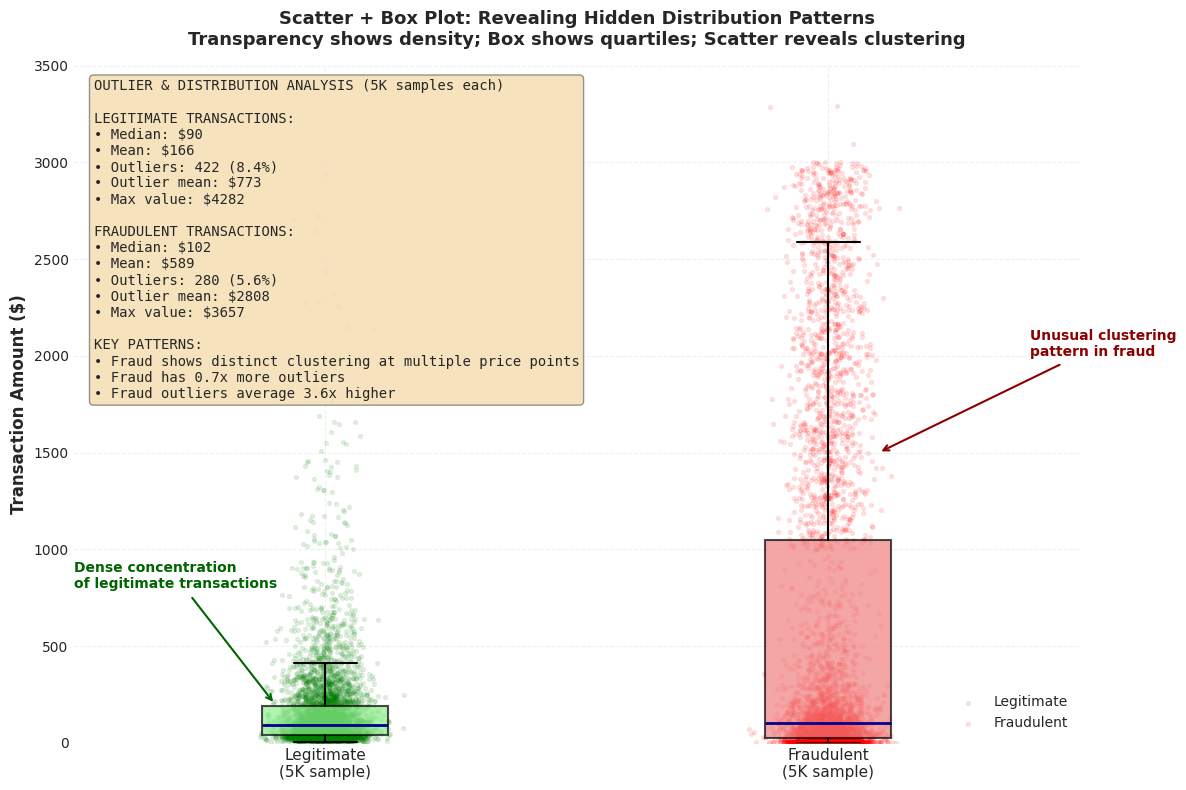

In [12]:
# @title
fig, ax2 = plt.subplots(figsize=(12, 8))

# Get data
fraud_amounts = df[df['is_fraud'] == 1]['amount']
legit_amounts = df[df['is_fraud'] == 0]['amount']

# Sample data
sample_size = min(len(fraud_amounts), 5000)
legit_sample = legit_amounts.sample(n=sample_size, random_state=42)
fraud_sample = fraud_amounts.sample(n=sample_size, random_state=42)

# Create jittered x positions for better visualization
np.random.seed(42)
legit_x = np.random.normal(1, 0.04, size=len(legit_sample))
fraud_x = np.random.normal(2, 0.04, size=len(fraud_sample))

# Scatter plots with transparency
ax2.scatter(legit_x, legit_sample, alpha=0.1, s=8, color='green', label='Legitimate')
ax2.scatter(fraud_x, fraud_sample, alpha=0.1, s=8, color='red', label='Fraudulent')

# Add box plots on top without outliers
bp = ax2.boxplot([legit_sample, fraud_sample],
                positions=[1, 2],
                widths=0.25,
                showfliers=False,
                patch_artist=True,
                boxprops=dict(alpha=0.7),
                medianprops=dict(color='darkblue', linewidth=2),
                whiskerprops=dict(linewidth=1.5),
                capprops=dict(linewidth=1.5))

# Color the boxes
colors = ['lightgreen', 'lightcoral']
for patch, color in zip(bp['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_edgecolor('black')
    patch.set_linewidth(1.5)

# Calculate outlier statistics
def get_outlier_stats(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    outliers = data[(data < Q1 - 1.5*IQR) | (data > Q3 + 1.5*IQR)]
    return len(outliers), outliers.mean() if len(outliers) > 0 else 0, outliers.max() if len(outliers) > 0 else 0

legit_outlier_count, legit_outlier_mean, legit_outlier_max = get_outlier_stats(legit_sample)
fraud_outlier_count, fraud_outlier_mean, fraud_outlier_max = get_outlier_stats(fraud_sample)

# Add comprehensive text box with statistics
stats_text = f"""OUTLIER & DISTRIBUTION ANALYSIS (5K samples each)

LEGITIMATE TRANSACTIONS:
• Median: ${legit_sample.median():.0f}
• Mean: ${legit_sample.mean():.0f}
• Outliers: {legit_outlier_count} ({legit_outlier_count/len(legit_sample)*100:.1f}%)
• Outlier mean: ${legit_outlier_mean:.0f}
• Max value: ${legit_sample.max():.0f}

FRAUDULENT TRANSACTIONS:
• Median: ${fraud_sample.median():.0f}
• Mean: ${fraud_sample.mean():.0f}
• Outliers: {fraud_outlier_count} ({fraud_outlier_count/len(fraud_sample)*100:.1f}%)
• Outlier mean: ${fraud_outlier_mean:.0f}
• Max value: ${fraud_sample.max():.0f}

KEY PATTERNS:
• Fraud shows distinct clustering at multiple price points
• Fraud has {(fraud_outlier_count/legit_outlier_count):.1f}x more outliers
• Fraud outliers average {(fraud_outlier_mean/legit_outlier_mean):.1f}x higher"""

# Position text box in upper left where there's space
ax2.text(0.02, 0.98, stats_text, transform=ax2.transAxes,
        fontsize=10, verticalalignment='top', family='monospace',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.85, edgecolor='gray', linewidth=1))

# Add annotations for visible patterns
# Annotate the fraud clustering pattern
ax2.annotate('Unusual clustering\npattern in fraud',
            xy=(2.1, 1500), xytext=(2.4, 2000),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=1.5),
            fontsize=10, color='darkred', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Annotate the concentration difference
ax2.annotate('Dense concentration\nof legitimate transactions',
            xy=(0.9, 200), xytext=(0.5, 800),
            arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5),
            fontsize=10, color='darkgreen', fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Set labels and title
ax2.set_xticks([1, 2])
ax2.set_xticklabels(['Legitimate\n(5K sample)', 'Fraudulent\n(5K sample)'], fontsize=11)
ax2.set_ylabel('Transaction Amount ($)', fontsize=12, fontweight='bold')
ax2.set_title('Scatter + Box Plot: Revealing Hidden Distribution Patterns\n' +
             'Transparency shows density; Box shows quartiles; Scatter reveals clustering',
             fontsize=13, fontweight='bold', pad=15)

# Set y-axis limit to show most data while keeping outliers visible
ax2.set_ylim(0, 3500)

# Add grid for better readability
ax2.grid(True, alpha=0.3, linestyle='--')

# Legend
ax2.legend(loc='lower right', framealpha=0.9, fontsize=10)

plt.tight_layout()
plt.show()

### 💡 Key Findings

- **\$1000+ transactions are highest risk**: 27.33% fraud rate, but only 2% of total volume
- **Fraudsters target higher amounts**: Average fraud transaction (\$590.96) is 3.5x larger than legitimate (\$167.83)
- **Ultra-high transactions are safe**: Top 10 highest amounts (up to \$16,994) are all legitimate - business purchases
- **Sweet spot for fraudsters**: 95th percentile fraud amount (\$2,626) suggests they avoid extreme highs that trigger scrutiny

---
<a name='security'>

## 4. Channel & Security Feature Analysis

### 📋 Business Question: Which channels are most vulnerable to fraud, and how effective are our security measures?

**Channel Fraud Rate Comparison:**
- Calculate for each channel (web, mobile, etc.):
  - Total transaction count
  - Fraud count  
  - Fraud rate (%)
  - Average transaction amount
- Sort channels by fraud rate (highest to lowest)

**Channel Volume vs Risk:**
- Identify which channel has:
  - Most transactions (volume leader)
  - Highest fraud rate (riskiest)
  - Highest total fraud count (biggest fraud problem)

**Channel Transaction Behavior:**
- For each channel, find:
  - Median transaction amount
  - Percentage of transactions using promo codes
  - Most common merchant category

In [13]:
# @title
# 1
metric = {
    'transaction_id': 'count',
    'is_fraud': ['sum', lambda x: x.sum()/x.count() * 100],
    'amount': 'mean'
}
channel_analysis = df.groupby('channel', observed=True).agg(metric)
channel_analysis.columns = ['total_transactions', 'fraud_count', 'fraud_rate', 'avg_transactions']
channel_analysis = channel_analysis.sort_values(by='fraud_rate', ascending=False)

print("="*60)
print("📊 CHANNEL FRAUD RATE COMPARISON")
print("="*60)
print("\nAll Channels Ranked by Fraud Risk:")
print(channel_analysis.to_string())


# Highest risk channel
highest_risk = channel_analysis.index[0]
print(f"\n1️⃣ Highest Risk Channel: {highest_risk.upper()}")
print(f"   Fraud Rate: {channel_analysis.loc[highest_risk, 'fraud_rate']:.2f}%")

# Lowest risk channel
lowest_risk = channel_analysis.index[-1]
print(f"\n2️⃣ Lowest Risk Channel: {lowest_risk.upper()}")
print(f"   Fraud Rate: {channel_analysis.loc[lowest_risk, 'fraud_rate']:.2f}%")

# Risk comparison
risk_ratio = channel_analysis.loc[highest_risk, 'fraud_rate'] / channel_analysis.loc[lowest_risk, 'fraud_rate']
print(f"\n3️⃣ Risk Comparison:")
print(f"   {highest_risk} is {risk_ratio:.1f}x riskier than {lowest_risk}")

# Average amount comparison
print(f"\n4️⃣ Average Transaction Amount:")
for channel in channel_analysis.index:
    print(f"   {channel}: ${channel_analysis.loc[channel, 'avg_transactions']:.2f}")

# 2
condition1 = channel_analysis['total_transactions'] == channel_analysis['total_transactions'].max()
condition2 = channel_analysis['fraud_rate'] == channel_analysis['fraud_rate'].max()
condition3 = channel_analysis['fraud_count'] == channel_analysis['fraud_count'].max()

volume_leader = channel_analysis[condition1]
riskest_channel = channel_analysis[condition2]
biggest_problem = channel_analysis[condition3]

print("\n"+"="*60)
print("🆚 CHANNEL VOLUME vs RISK")
print("="*60)
print(f"\n1️⃣ Volume Leader: {volume_leader.index[0].upper()}")
print(volume_leader)

print(f"\n2️⃣ Most risky Channel: {riskest_channel.index[0].upper()}")
print(riskest_channel)

print(f"\n3️⃣ Biggest Problem Channel: {biggest_problem.index[0].upper()}")
print(biggest_problem)

print(f"\nChannel WEB accounts for:")
print(f"- {volume_leader['total_transactions'].values[0]/df.shape[0]*100:.1f}% of all transactions")
print(f"- {volume_leader['fraud_count'].values[0]/df['is_fraud'].sum()*100:.1f}% of all frauds")


# 3

metric = {
    'amount': 'median',
    'promo_used': lambda x: x[ x== 1].count()/x.count() * 100,
    'merchant_category': lambda x: x.value_counts(sort=True, ascending=False).index[0]
}

channel_behavior = df.groupby('channel').agg(metric)
channel_behavior.columns = ['median_amount', 'percentage_promo_used', 'top_category']


print("\n"+"="*60)
print("📊 CHANNEL TRANSACTION BEHAVIOR")
print("="*60)
print(channel_behavior)

📊 CHANNEL FRAUD RATE COMPARISON

All Channels Ranked by Fraud Risk:
         total_transactions  fraud_count  fraud_rate  avg_transactions
channel                                                               
web                  152226         5426    3.564437        182.670108
app                  147469         1186    0.804237        171.482876

1️⃣ Highest Risk Channel: WEB
   Fraud Rate: 3.56%

2️⃣ Lowest Risk Channel: APP
   Fraud Rate: 0.80%

3️⃣ Risk Comparison:
   web is 4.4x riskier than app

4️⃣ Average Transaction Amount:
   web: $182.67
   app: $171.48

🆚 CHANNEL VOLUME vs RISK

1️⃣ Volume Leader: WEB
         total_transactions  fraud_count  fraud_rate  avg_transactions
channel                                                               
web                  152226         5426    3.564437        182.670108

2️⃣ Most risky Channel: WEB
         total_transactions  fraud_count  fraud_rate  avg_transactions
channel                                                        

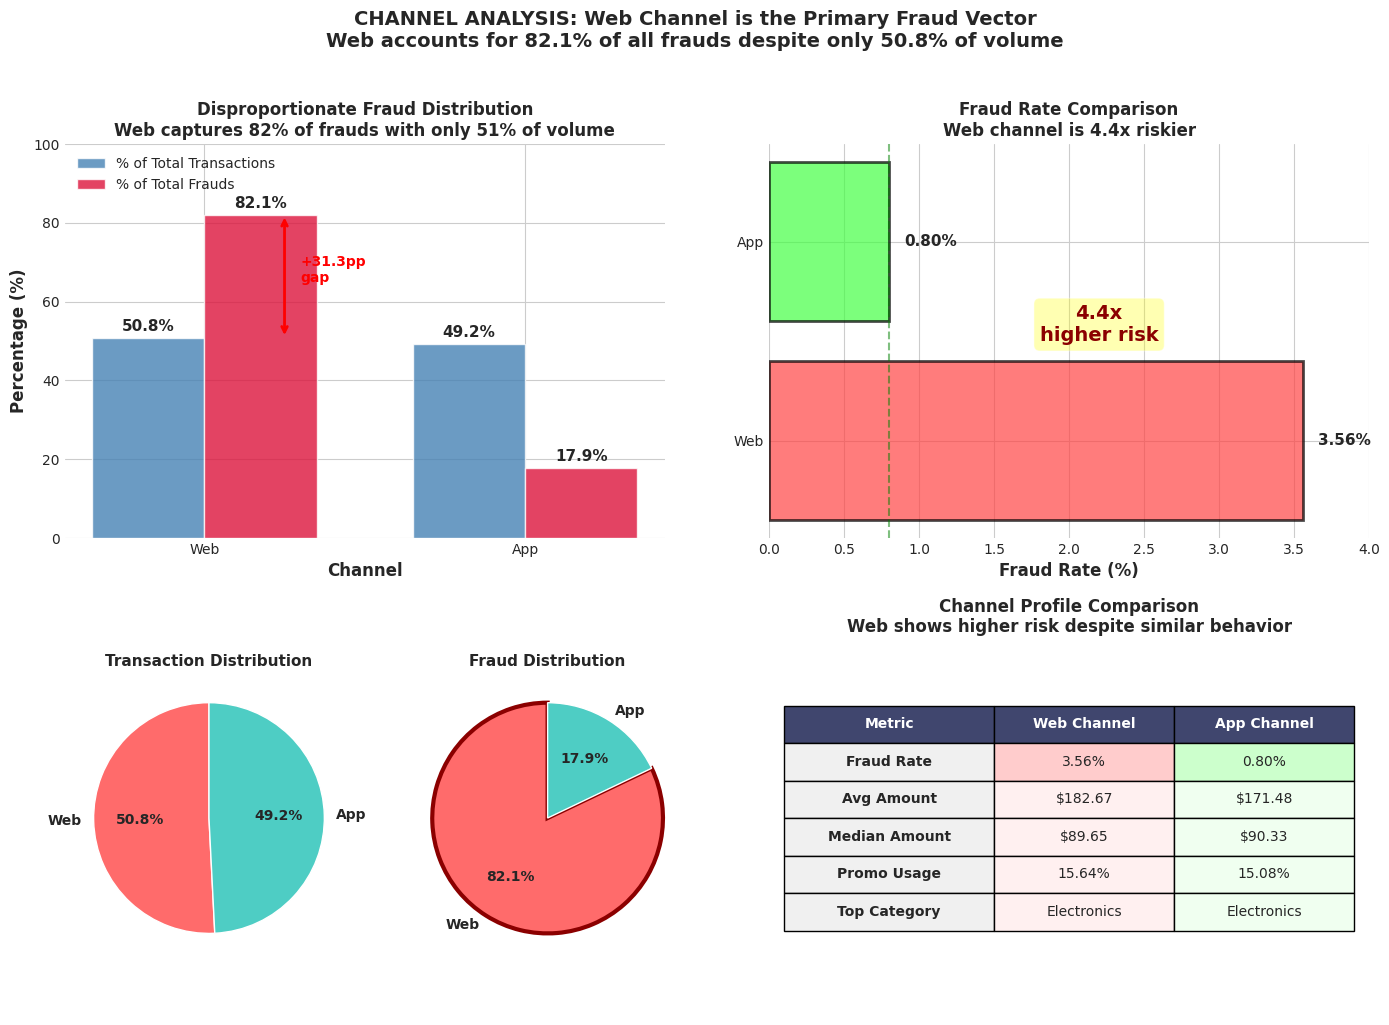

In [14]:
# @title
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# ========== Top Left: Dual Bar Chart - Volume vs Fraud Share ==========
ax1 = axes[0, 0]

channels = ['Web', 'App']
transaction_share = [50.8, 49.2]  # Web has 50.8% of transactions
fraud_share = [82.1, 17.9]  # Web has 82.1% of frauds

x = np.arange(len(channels))
width = 0.35

bars1 = ax1.bar(x - width/2, transaction_share, width,
                label='% of Total Transactions', color='steelblue', alpha=0.8)
bars2 = ax1.bar(x + width/2, fraud_share, width,
                label='% of Total Frauds', color='crimson', alpha=0.8)

# Add value labels on bars
for bar in bars1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')
for bar in bars2:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{height:.1f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

ax1.set_xlabel('Channel', fontsize=12, fontweight='bold')
ax1.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax1.set_title('Disproportionate Fraud Distribution\nWeb captures 82% of frauds with only 51% of volume',
              fontsize=12, fontweight='bold')
ax1.set_xticks(x)
ax1.set_xticklabels(channels)
ax1.legend(loc='upper left')
ax1.set_ylim(0, 100)

# Add annotation for the gap
ax1.annotate('', xy=(0.25, transaction_share[0]), xytext=(0.25, fraud_share[0]),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax1.text(0.3, 65, f'+{fraud_share[0]-transaction_share[0]:.1f}pp\ngap',
         fontsize=10, color='red', fontweight='bold')

# ========== Top Right: Risk Multiplier Visualization ==========
ax2 = axes[0, 1]

# Create visual comparison of risk rates
risk_data = [3.56, 0.80]  # Web: 3.56%, App: 0.80%
colors = ['#ff4444', '#44ff44']

bars = ax2.barh(channels, risk_data, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add risk multiplier annotation
ax2.axvline(x=0.80, color='green', linestyle='--', alpha=0.5)
ax2.text(2.2, 0.5, '4.4x\nhigher risk', fontsize=14, fontweight='bold',
         color='darkred', ha='center',
         bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.3))

# Add value labels
for i, (bar, value) in enumerate(zip(bars, risk_data)):
    ax2.text(value + 0.1, i, f'{value:.2f}%',
            va='center', fontsize=11, fontweight='bold')

ax2.set_xlabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Fraud Rate Comparison\nWeb channel is 4.4x riskier',
              fontsize=12, fontweight='bold')
ax2.set_xlim(0, 4)

# ========== Bottom Left: Pie Charts Side by Side ==========
ax3 = axes[1, 0]
ax3.axis('off')

# Create two pie charts
ax3a = fig.add_subplot(2, 4, 5)
ax3b = fig.add_subplot(2, 4, 6)

# Transaction distribution pie
colors1 = ['#ff6b6b', '#4ecdc4']
wedges1, texts1, autotexts1 = ax3a.pie(transaction_share, labels=channels,
                                         colors=colors1, autopct='%1.1f%%',
                                         startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3a.set_title('Transaction Distribution', fontsize=11, fontweight='bold')

# Fraud distribution pie
wedges2, texts2, autotexts2 = ax3b.pie(fraud_share, labels=channels,
                                        colors=colors1, autopct='%1.1f%%',
                                        startangle=90, textprops={'fontsize': 10, 'fontweight': 'bold'})
ax3b.set_title('Fraud Distribution', fontsize=11, fontweight='bold')

# Make Web slice explode in fraud pie to emphasize
wedges2[0].set_edgecolor('darkred')
wedges2[0].set_linewidth(3)

# ========== Bottom Right: Channel Profile Comparison ==========
ax4 = axes[1, 1]

# Create comparison table
categories = ['Fraud Rate', 'Avg Amount', 'Median Amount', 'Promo Usage', 'Top Category']
web_values = ['3.56%', '$182.67', '$89.65', '15.64%', 'Electronics']
app_values = ['0.80%', '$171.48', '$90.33', '15.08%', 'Electronics']

# Create table data
table_data = []
for cat, web, app in zip(categories, web_values, app_values):
    table_data.append([cat, web, app])

# Create table
table = ax4.table(cellText=table_data,
                  colLabels=['Metric', 'Web Channel', 'App Channel'],
                  cellLoc='center',
                  loc='center',
                  colWidths=[0.35, 0.3, 0.3])

table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 2)

# Style the table
for i in range(len(categories) + 1):
    for j in range(3):
        cell = table[(i, j)]
        if i == 0:  # Header row
            cell.set_facecolor('#40466e')
            cell.set_text_props(weight='bold', color='white')
        else:
            if j == 0:  # Metric column
                cell.set_facecolor('#f0f0f0')
                cell.set_text_props(weight='bold')
            elif j == 1:  # Web column
                if i == 1:  # Fraud rate row
                    cell.set_facecolor('#ffcccc')
                else:
                    cell.set_facecolor('#fff0f0')
            else:  # App column
                if i == 1:  # Fraud rate row
                    cell.set_facecolor('#ccffcc')
                else:
                    cell.set_facecolor('#f0fff0')

ax4.axis('off')
ax4.set_title('Channel Profile Comparison\nWeb shows higher risk despite similar behavior',
              fontsize=12, fontweight='bold', y=0.95)

# Main title
fig.suptitle('CHANNEL ANALYSIS: Web Channel is the Primary Fraud Vector\n' +
             'Web accounts for 82.1% of all frauds despite only 50.8% of volume',
             fontsize=14, fontweight='bold', y=1.02)

plt.tight_layout()
plt.show()

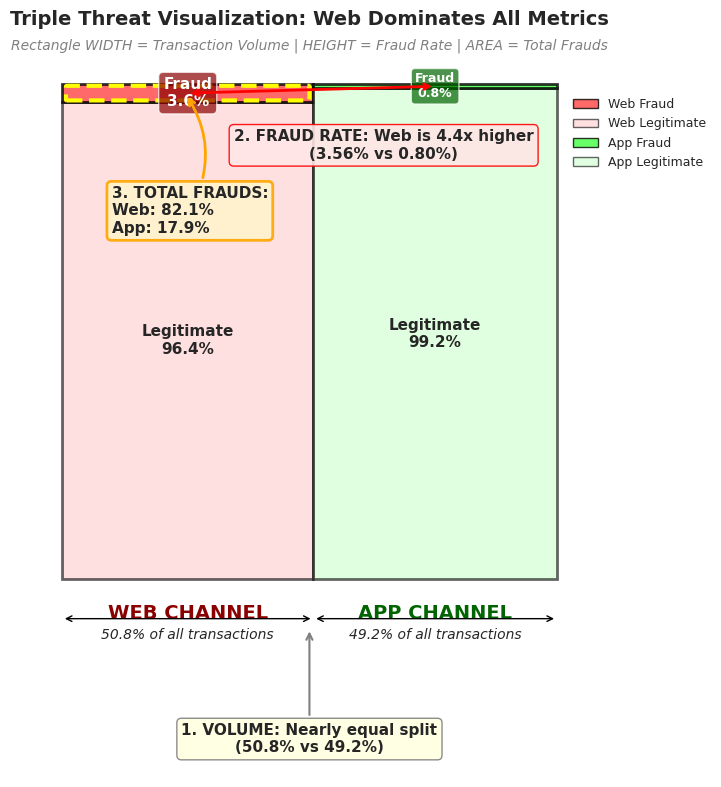

In [15]:
# @title
from matplotlib.patches import FancyBboxPatch, FancyArrowPatch
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(12, 8))

# Data
web_volume = 50.8
app_volume = 49.2
web_fraud_rate = 3.56
app_fraud_rate = 0.80

# Calculate positions
total_width = 10
web_width = total_width * (web_volume / 100)
app_width = total_width * (app_volume / 100)

total_height = 10
web_fraud_height = total_height * (web_fraud_rate / 100)
web_legit_height = total_height * ((100 - web_fraud_rate) / 100)
app_fraud_height = total_height * (app_fraud_rate / 100)
app_legit_height = total_height * ((100 - app_fraud_rate) / 100)

# Draw rectangles
# Web legitimate (bottom left)
web_legit = patches.Rectangle((0, 0), web_width, web_legit_height,
                              linewidth=2, edgecolor='black',
                              facecolor='#ffcccc', alpha=0.6)
ax.add_patch(web_legit)

# Web fraud (top left)
web_fraud = patches.Rectangle((0, web_legit_height), web_width, web_fraud_height,
                              linewidth=2, edgecolor='black',
                              facecolor='#ff4444', alpha=0.8)
ax.add_patch(web_fraud)

# App legitimate (bottom right)
app_legit = patches.Rectangle((web_width, 0), app_width, app_legit_height,
                              linewidth=2, edgecolor='black',
                              facecolor='#ccffcc', alpha=0.6)
ax.add_patch(app_legit)

# App fraud (top right)
app_fraud = patches.Rectangle((web_width, app_legit_height), app_width, app_fraud_height,
                              linewidth=2, edgecolor='black',
                              facecolor='#44ff44', alpha=0.8)
ax.add_patch(app_fraud)

# Add channel labels
ax.text(web_width/2, -0.5, 'WEB CHANNEL', ha='center', va='top',
        fontsize=14, fontweight='bold', color='darkred')
ax.text(web_width + app_width/2, -0.5, 'APP CHANNEL', ha='center', va='top',
        fontsize=14, fontweight='bold', color='darkgreen')

# Add percentage labels inside rectangles
# Web legitimate
ax.text(web_width/2, web_legit_height/2, f'Legitimate\n{100-web_fraud_rate:.1f}%',
        ha='center', va='center', fontsize=11, fontweight='bold')

# Web fraud
ax.text(web_width/2, web_legit_height + web_fraud_height/2, f'Fraud\n{web_fraud_rate:.1f}%',
        ha='center', va='center', fontsize=11, fontweight='bold', color='white',
        bbox=dict(boxstyle='round', facecolor='darkred', alpha=0.7))

# App legitimate
ax.text(web_width + app_width/2, app_legit_height/2, f'Legitimate\n{100-app_fraud_rate:.1f}%',
        ha='center', va='center', fontsize=11, fontweight='bold')

# App fraud
ax.text(web_width + app_width/2, app_legit_height + app_fraud_height/2, f'Fraud\n{app_fraud_rate:.1f}%',
        ha='center', va='center', fontsize=9, fontweight='bold', color='white',
        bbox=dict(boxstyle='round', facecolor='darkgreen', alpha=0.7))

# Add volume indicators at the bottom
ax.text(web_width/2, -1.2, f'{web_volume}% of all transactions',
        ha='center', fontsize=10, style='italic')
ax.text(web_width + app_width/2, -1.2, f'{app_volume}% of all transactions',
        ha='center', fontsize=10, style='italic')

# Add dimension lines for width
ax.annotate('', xy=(0, -0.8), xytext=(web_width, -0.8),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1))
ax.annotate('', xy=(web_width, -0.8), xytext=(total_width, -0.8),
            arrowprops=dict(arrowstyle='<->', color='black', lw=1))

# Add three key insights with arrows
# Insight 1: Transaction Volume comparison
ax.annotate('1. VOLUME: Nearly equal split\n(50.8% vs 49.2%)',
            xy=(5, -1), xytext=(5, -3.5),
            ha='center', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.9, edgecolor='gray'),
            arrowprops=dict(arrowstyle='->', color='gray', lw=1.5))

# Insight 2: Fraud Rate comparison (visual height difference)
ax.annotate('', xy=(web_width/2, web_legit_height + web_fraud_height/2),
            xytext=(web_width + app_width/2, app_legit_height + app_fraud_height/2),
            arrowprops=dict(arrowstyle='<->', color='red', lw=2))
ax.text(6.5, 8.5, '2. FRAUD RATE: Web is 4.4x higher\n(3.56% vs 0.80%)',
        ha='center', fontsize=11, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='#ffe6e6', alpha=0.9, edgecolor='red'))

# Insight 3: Total fraud distribution
# Calculate actual fraud counts (areas of fraud rectangles)
web_fraud_area = web_width * web_fraud_height
app_fraud_area = app_width * app_fraud_height
total_fraud_area = web_fraud_area + app_fraud_area
web_fraud_percentage = (web_fraud_area / total_fraud_area) * 100
app_fraud_percentage = (app_fraud_area / total_fraud_area) * 100

# Draw callout for fraud distribution
ax.annotate(f'3. TOTAL FRAUDS:\nWeb: {web_fraud_percentage:.1f}%\nApp: {app_fraud_percentage:.1f}%',
            xy=(2.5, 9.8), xytext=(1, 7),
            ha='left', fontsize=11, fontweight='bold',
            bbox=dict(boxstyle='round', facecolor='#fff3cd', alpha=0.9, edgecolor='orange', linewidth=2),
            arrowprops=dict(arrowstyle='->', color='orange', lw=2,
                          connectionstyle="arc3,rad=0.3"))

# Add visual emphasis on fraud area size difference
fraud_box_web = patches.FancyBboxPatch((0.1, web_legit_height + 0.05),
                                       web_width - 0.2, web_fraud_height - 0.1,
                                       boxstyle="round,pad=0.02",
                                       edgecolor='yellow', linewidth=3,
                                       facecolor='none', linestyle='--')
ax.add_patch(fraud_box_web)

# Set axis properties
ax.set_xlim(-0.5, 10.5)
ax.set_ylim(-4, 11.5)
ax.set_aspect('equal')
ax.axis('off')

# Add title
ax.text(5, 11.2, 'Triple Threat Visualization: Web Dominates All Metrics',
        ha='center', fontsize=14, fontweight='bold')
ax.text(5, 10.7, 'Rectangle WIDTH = Transaction Volume | HEIGHT = Fraud Rate | AREA = Total Frauds',
        ha='center', fontsize=10, style='italic', color='gray')

# Add legend for colors
legend_elements = [patches.Patch(facecolor='#ff4444', alpha=0.8, edgecolor='black', label='Web Fraud'),
                  patches.Patch(facecolor='#ffcccc', alpha=0.6, edgecolor='black', label='Web Legitimate'),
                  patches.Patch(facecolor='#44ff44', alpha=0.8, edgecolor='black', label='App Fraud'),
                  patches.Patch(facecolor='#ccffcc', alpha=0.6, edgecolor='black', label='App Legitimate')]

ax.legend(handles=legend_elements, loc='upper right', bbox_to_anchor=(1.25, 0.9),
         framealpha=0.9, fontsize=9)

plt.tight_layout()
plt.show()

### 💡 Key Findings

- **Web channel is the critical vulnerability**: 4.4x higher fraud rate than app (3.56% vs 0.80%)
- **Triple threat**: Web leads in volume (50.8%), fraud rate, AND total fraud count (82.1% of all frauds)
- **Similar user behavior across channels**: Both prefer electronics, similar transaction amounts (\~$90), and promo usage (~15%)
- **App provides better security**: Despite nearly equal transaction volumes (51% vs 49%), web accounts for 82% of all frauds


---
<a name="feature"></a>
## 5. Security Features Analysis

### 📋 Business Question: How effective are our security measures in preventing fraud?

**Individual Security Feature Performance:**
- For each security feature (`avs_match`, `cvv_result`, `three_ds_flag`):
  - Compare fraud rates when feature is enabled (1) vs disabled (0)
  - Calculate fraud count and fraud rate for each state
  - Measure effectiveness: (fraud_rate_disabled - fraud_rate_enabled) / fraud_rate_disabled * 100


**Security Feature Combinations:**
- Create a combined security score (0-3) by summing all three features
- For each score level (0, 1, 2, 3):
  - Transaction count
  - Fraud count
  - Fraud rate

**Channel-Security Relationship:**
- For each channel:
  - Percentage of transactions with all security features passed (score = 3)
  - Average security score

In [16]:
# @title
# 1

print("="*60)
print("SECURITY FEATURE EFFECTIVENESS")
print("="*60)

effectivenesses = {}
for feature in ['avs_match', 'cvv_result', 'three_ds_flag']:
  metric = {
      'is_fraud': ['sum', lambda x: x.sum()/x.count()*100]
  }
  res = df.groupby(feature).agg(metric).reset_index()
  res.columns = ['feature_on', 'fraud_count', 'fraud_rate']
  failed = res[res['feature_on'] == 0]
  passed = res[res['feature_on'] == 1]

  [failed_fraud_cnt, failed_fraud_rate] = [failed['fraud_count'].iloc[0], failed['fraud_rate'].iloc[0]]
  [passed_fraud_cnt, passed_fraud_rate] = [passed['fraud_count'].iloc[0], passed['fraud_rate'].iloc[0]]

  effectiveness = (failed_fraud_rate-passed_fraud_rate)/failed_fraud_rate * 100

  effectivenesses[feature] = effectiveness

  print(f"\n{feature.upper()}:")
  print(f"  Failed (0): {failed_fraud_rate:.2f}% fraud rate")
  print(f"  Passed (1): {passed_fraud_rate:.2f}% fraud rate")
  print(f"  Effectiveness: {effectiveness:.2f}%")

# 2

df['security_score'] = np.sum(df[['avs_match', 'cvv_result', 'three_ds_flag']], axis = 1)

metric = {
    'transaction_id': 'count',
    'is_fraud' : ['sum', lambda x: x.sum() / x.count() * 100]
}

feature_score_analysis = df.groupby('security_score', observed = True).agg(metric)
feature_score_analysis.columns = ['total_transactions', 'fraud_count', 'fraud_rate']

print("\n"+"="*60)
print("SECURITY SCORE ANALYSIS")
print("="*60)
print(feature_score_analysis.reset_index().to_string(index=False))

# Add percentage of total for each score level
feature_score_analysis['pct_of_total'] = (feature_score_analysis['total_transactions'] / len(df) * 100).round(2)

print("\nSECURITY SCORE DISTRIBUTION")

for score in feature_score_analysis.index:
    pct = feature_score_analysis.loc[score, 'pct_of_total']
    fraud_rate = feature_score_analysis.loc[score, 'fraud_rate']
    print(f"Score {score}: {pct:5.1f}% of transactions, {fraud_rate:5.2f}% fraud rate")

# 3
metric = {
  'security_score': ['mean', lambda x: x[x==3].count()/x.count()*100]
}
channel_security_analysis = df.groupby('channel').agg(metric)
channel_security_analysis.columns = ['avg_security_score', 'all_features_on_%']

print("="*60)
print("CHANNEL-SECURITY RELATIONSHIP")
print("="*60)
print(channel_security_analysis.round(2).reset_index().to_string(index=False))


SECURITY FEATURE EFFECTIVENESS

AVS_MATCH:
  Failed (0): 9.67% fraud rate
  Passed (1): 0.76% fraud rate
  Effectiveness: 92.10%

CVV_RESULT:
  Failed (0): 10.61% fraud rate
  Passed (1): 0.97% fraud rate
  Effectiveness: 90.81%

THREE_DS_FLAG:
  Failed (0): 6.75% fraud rate
  Passed (1): 0.96% fraud rate
  Effectiveness: 85.81%

SECURITY SCORE ANALYSIS
 security_score  total_transactions  fraud_count  fraud_rate
              0               18745         3390   18.084823
              1               19183          911    4.748997
              2               56836         1125    1.979379
              3              204931         1186    0.578731

SECURITY SCORE DISTRIBUTION
Score 0:   6.2% of transactions, 18.08% fraud rate
Score 1:   6.4% of transactions,  4.75% fraud rate
Score 2:  19.0% of transactions,  1.98% fraud rate
Score 3:  68.4% of transactions,  0.58% fraud rate
CHANNEL-SECURITY RELATIONSHIP
channel  avg_security_score  all_features_on_%
    app                2.52  

### 💡 Key Findings

- **All security features highly effective**: AVS Match (92.1%), CVV (90.8%), and 3DS (85.8%) dramatically reduce fraud
- **Layered security is critical**: Fraud rate drops from 18.08% (no security) to 0.58% (all features) - a 31x reduction
- **Most transactions are well-protected**: 68.4% have all security features active, resulting in $<$1% fraud rate
- **Minimal channel differences**: App and web have similar security adoption rates (~69% and 68% full security)
- **High-risk segment identified**: 6.2% of transactions with no security features account for disproportionate fraud

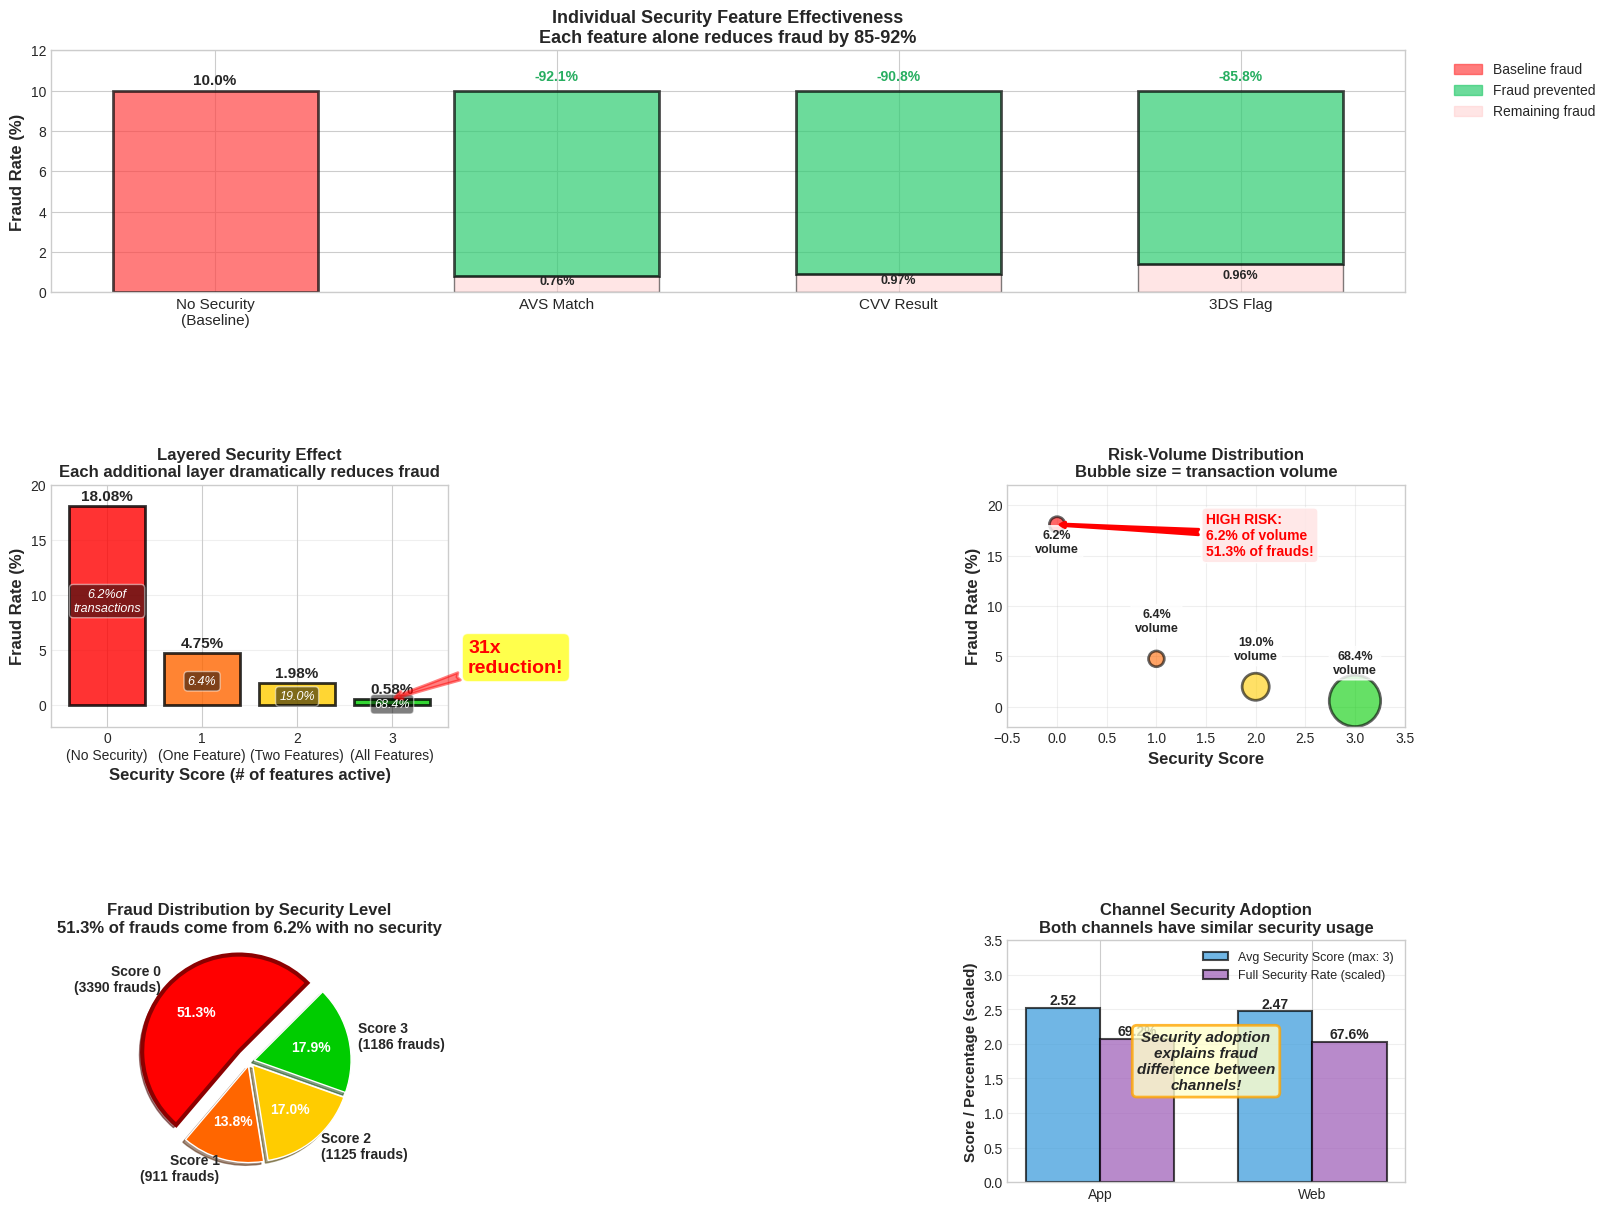

In [17]:
import matplotlib.patches as mpatches

# @title
# Set style
plt.style.use('seaborn-v0_8-whitegrid')
fig = plt.figure(figsize=(16, 12), constrained_layout=True)
gs = fig.add_gridspec(3, 2, hspace=0.3, wspace=0.25)

# ========== 1. INDIVIDUAL FEATURE EFFECTIVENESS (Waterfall Chart) ==========
ax1 = fig.add_subplot(gs[0, :])

features = ['No Security\n(Baseline)', 'AVS Match', 'CVV Result', '3DS Flag']
effectiveness = [0, 92.10, 90.81, 85.81]
fraud_rates = [10, 0.76, 0.97, 0.96]  # Approximate baseline from failed rates

# Create waterfall effect
x = np.arange(len(features))
colors = ['#ff4444', '#2ecc71', '#2ecc71', '#2ecc71']

# Draw bars showing reduction
baseline = 10  # Average failed fraud rate
current = baseline
x_pos = 0

for i, (feature, eff) in enumerate(zip(features, effectiveness)):
    if i == 0:
        # Baseline bar
        bar = ax1.bar(x_pos, baseline, color='#ff4444', alpha=0.7,
                      edgecolor='black', linewidth=2, width=0.6)
        ax1.text(x_pos, baseline + 0.3, f'{baseline:.1f}%',
                ha='center', fontsize=11, fontweight='bold')
    else:
        # Reduction bars
        reduction = baseline * (eff/100)
        remaining = baseline * (1 - eff/100)

        # Draw remaining fraud (bottom)
        bar1 = ax1.bar(x_pos, remaining, color='#ffcccc', alpha=0.5,
                      edgecolor='black', linewidth=1, width=0.6)

        # Draw reduction (top, different color)
        bar2 = ax1.bar(x_pos, reduction, bottom=remaining, color='#2ecc71', alpha=0.7,
                      edgecolor='black', linewidth=2, width=0.6)

        # Add effectiveness label
        ax1.text(x_pos, baseline + 0.5, f'-{eff:.1f}%',
                ha='center', fontsize=10, fontweight='bold', color='#27ae60')

        # Add final fraud rate
        ax1.text(x_pos, remaining/2, f'{fraud_rates[i]:.2f}%',
                ha='center', fontsize=9, fontweight='bold')

    x_pos += 1

ax1.set_xticks(range(len(features)))
ax1.set_xticklabels(features, fontsize=11)
ax1.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax1.set_title('Individual Security Feature Effectiveness\nEach feature alone reduces fraud by 85-92%',
              fontsize=13, fontweight='bold')
ax1.set_ylim(0, 12)

# Add legend
legend_elements = [mpatches.Patch(color='#ff4444', alpha=0.7, label='Baseline fraud'),
                  mpatches.Patch(color='#2ecc71', alpha=0.7, label='Fraud prevented'),
                  mpatches.Patch(color='#ffcccc', alpha=0.5, label='Remaining fraud')]
ax1.legend(handles=legend_elements, loc='upper right', fontsize=10, bbox_to_anchor=(1.15, 1))

# ========== 2. LAYERED SECURITY IMPACT (Staircase) ==========
ax2 = fig.add_subplot(gs[1, 0])

security_scores = [0, 1, 2, 3]
fraud_rates_by_score = [18.08, 4.75, 1.98, 0.58]
transaction_pct = [6.2, 6.4, 19.0, 68.4]

# Create staircase effect
colors = ['#ff0000', '#ff6600', '#ffcc00', '#00cc00']
bars = ax2.bar(security_scores, fraud_rates_by_score, color=colors,
               alpha=0.8, edgecolor='black', linewidth=2)

# Add value labels
for i, (bar, rate, pct) in enumerate(zip(bars, fraud_rates_by_score, transaction_pct)):
    # Fraud rate on top
    ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f'{rate:.2f}%', ha='center', fontsize=11, fontweight='bold')

    # Transaction % inside or below bar
    y_pos = bar.get_height()/2 #if bar.get_height() > 3 else -1
    annotation = f'{pct:.1f}%'
    if i == 0: annotation += 'of\ntransactions'

    ax2.text(bar.get_x() + bar.get_width()/2, y_pos-0.5,
            annotation, ha='center',  fontsize=9,
            style='italic', color='white' if y_pos > 0 else 'black',
            bbox=dict(boxstyle='round', facecolor='black' if y_pos > 0 else 'white',
                     alpha=0.5 if y_pos > 0 else 0.8))

# Add dramatic comparison
ax2.annotate('31x\nreduction!', xy=(3, 0.58), xytext=(3.8, 3),
            arrowprops=dict(arrowstyle='fancy', color='red', lw=2, alpha=0.5),
            fontsize=14, fontweight='bold', color='red',
            bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.7))

ax2.set_xlabel('Security Score (# of features active)', fontsize=12, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Layered Security Effect\nEach additional layer dramatically reduces fraud',
              fontsize=12, fontweight='bold')
ax2.set_xticks(security_scores)
ax2.set_xticklabels(['0\n(No Security)', '1\n(One Feature)', '2\n(Two Features)', '3\n(All Features)'])
ax2.set_ylim(-2, 20)
ax2.grid(axis='y', alpha=0.3)

# ========== 3. VOLUME vs RISK MATRIX ==========
ax3 = fig.add_subplot(gs[1, 1])

# Create bubble chart
x = security_scores
y = fraud_rates_by_score
sizes = [pct * 20 for pct in transaction_pct]  # Scale for visibility

scatter = ax3.scatter(x, y, s=sizes, c=colors, alpha=0.6,
                     edgecolors='black', linewidths=2)

# Add labels for each bubble
for i, (score, rate, pct) in enumerate(zip(security_scores, fraud_rates_by_score, transaction_pct)):
    ax3.annotate(f'{pct:.1f}%\nvolume', xy=(score, rate),
                xytext=(0, -20 if rate > 5 else 20),
                textcoords='offset points', ha='center',
                fontsize=9, fontweight='bold',
                bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

ax3.annotate('HIGH RISK:\n6.2% of volume\n51.3% of frauds!',
            xy=(0, 18.08), xytext=(1.5, 15),
            arrowprops=dict(arrowstyle='fancy', color='red', lw=2),
            fontsize=10, fontweight='bold', color='red',
            bbox=dict(boxstyle='round', facecolor='#ffe6e6', alpha=0.9))

ax3.set_xlabel('Security Score', fontsize=12, fontweight='bold')
ax3.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax3.set_title('Risk-Volume Distribution\nBubble size = transaction volume',
              fontsize=12, fontweight='bold')
ax3.set_xlim(-0.5, 3.5)
ax3.set_ylim(-2, 22)
ax3.grid(True, alpha=0.3)

# ========== 4. FRAUD DISTRIBUTION PIE ==========
ax4 = fig.add_subplot(gs[2, 0])

# Calculate fraud distribution by security score
fraud_by_score = [3390, 911, 1125, 1186]
labels = [f'Score {i}\n({fraud:.0f} frauds)' for i, fraud in enumerate(fraud_by_score)]
colors_pie = ['#ff0000', '#ff6600', '#ffcc00', '#00cc00']
explode = (0.15, 0.05, 0.05, 0.05)  # Explode the worst segment

wedges, texts, autotexts = ax4.pie(fraud_by_score, labels=labels, colors=colors_pie,
                                    autopct='%1.1f%%', explode=explode,
                                    shadow=True, startangle=45)

# Enhance text
for text in texts:
    text.set_fontsize(10)
    text.set_fontweight('bold')
for autotext in autotexts:
    autotext.set_color('white')
    autotext.set_fontsize(10)
    autotext.set_fontweight('bold')

# Highlight the problem
wedges[0].set_edgecolor('darkred')
wedges[0].set_linewidth(3)

ax4.set_title('Fraud Distribution by Security Level\n51.3% of frauds come from 6.2% with no security',
              fontsize=12, fontweight='bold')

# ========== 5. CHANNEL SECURITY COMPARISON ==========
ax5 = fig.add_subplot(gs[2, 1])

channels = ['App', 'Web']
avg_scores = [2.52, 2.47]
full_security = [69.18, 67.60]

x = np.arange(len(channels))
width = 0.35

bars1 = ax5.bar(x - width/2, avg_scores, width, label='Avg Security Score (max: 3)',
               color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.5)
bars2 = ax5.bar(x + width/2, [s/100*3 for s in full_security], width,
               label=f'Full Security Rate (scaled)',
               color='#9b59b6', alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels
for bar, val in zip(bars1, avg_scores):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
            f'{val:.2f}', ha='center', fontsize=10, fontweight='bold')
for bar, val in zip(bars2, full_security):
    ax5.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
            f'{val:.1f}%', ha='center', fontsize=10, fontweight='bold')

ax5.set_ylabel('Score / Percentage (scaled)', fontsize=11, fontweight='bold')
ax5.set_title('Channel Security Adoption\nBoth channels have similar security usage',
              fontsize=12, fontweight='bold')
ax5.set_xticks(x)
ax5.set_xticklabels(channels)
ax5.legend(loc='upper right', fontsize=9)
ax5.set_ylim(0, 3.5)
ax5.grid(axis='y', alpha=0.3)

# Add insight text
ax5.text(0.5, 0.5, 'Security adoption\nexplains fraud\ndifference between\nchannels!',
        transform=ax5.transAxes, ha='center', va='center',
        fontsize=11, fontweight='bold', style='italic',
        bbox=dict(boxstyle='round', facecolor='#ffffcc', alpha=0.8, edgecolor='orange', linewidth=2))

plt.show()

/tmp/ipython-input-2626090621.py:49: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


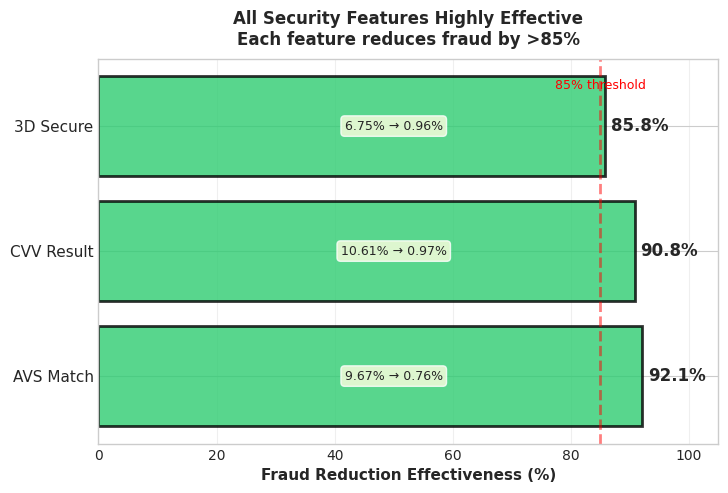

In [18]:
# @title
# Set style
sns.set_style("whitegrid")
fig = plt.figure(figsize=(8, 5))
gs = fig.add_gridspec(1, 1, hspace=0.35, wspace=0.3)

# Data
security_scores = [0, 1, 2, 3]
fraud_rates = [18.08, 4.75, 1.98, 0.58]
transaction_pcts = [6.2, 6.4, 19.0, 68.4]
fraud_counts = [3390, 911, 1125, 1186]

# Feature effectiveness
features = ['AVS Match', 'CVV Result', '3D Secure']
effectiveness = [92.10, 90.81, 85.81]
failed_rates = [9.67, 10.61, 6.75]
passed_rates = [0.76, 0.97, 0.96]

# ========== 2. INDIVIDUAL FEATURE EFFECTIVENESS ==========
ax1 = fig.add_subplot(gs[0, 0])

y_pos = np.arange(len(features))
bars_eff = ax1.barh(y_pos, effectiveness, color='#2ecc71',
                    alpha=0.8, edgecolor='black', linewidth=2)

# Add percentage labels
for i, (bar, eff) in enumerate(zip(bars_eff, effectiveness)):
    width = bar.get_width()
    ax1.text(width + 1, i, f'{eff:.1f}%', va='center',
            fontsize=12, fontweight='bold')

# Add before/after rates as annotations
for i, (feature, failed, passed) in enumerate(zip(features, failed_rates, passed_rates)):
    ax1.text(50, i, f'{failed:.2f}% → {passed:.2f}%',
            va='center', ha='center', fontsize=9,
            bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

ax1.set_yticks(y_pos)
ax1.set_yticklabels(features, fontsize=11)
ax1.set_xlabel('Fraud Reduction Effectiveness (%)', fontsize=11, fontweight='bold')
ax1.set_title('All Security Features Highly Effective\nEach feature reduces fraud by >85%',
              fontsize=12, fontweight='bold', pad=10)
ax1.set_xlim(0, 105)
ax1.axvline(x=85, color='red', linestyle='--', alpha=0.5, linewidth=2)
ax1.text(85, 2.3, '85% threshold', fontsize=9, color='red', ha='center')
ax1.grid(axis='x', alpha=0.3)


plt.tight_layout()
plt.show()

/tmp/ipython-input-1032669661.py:186: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


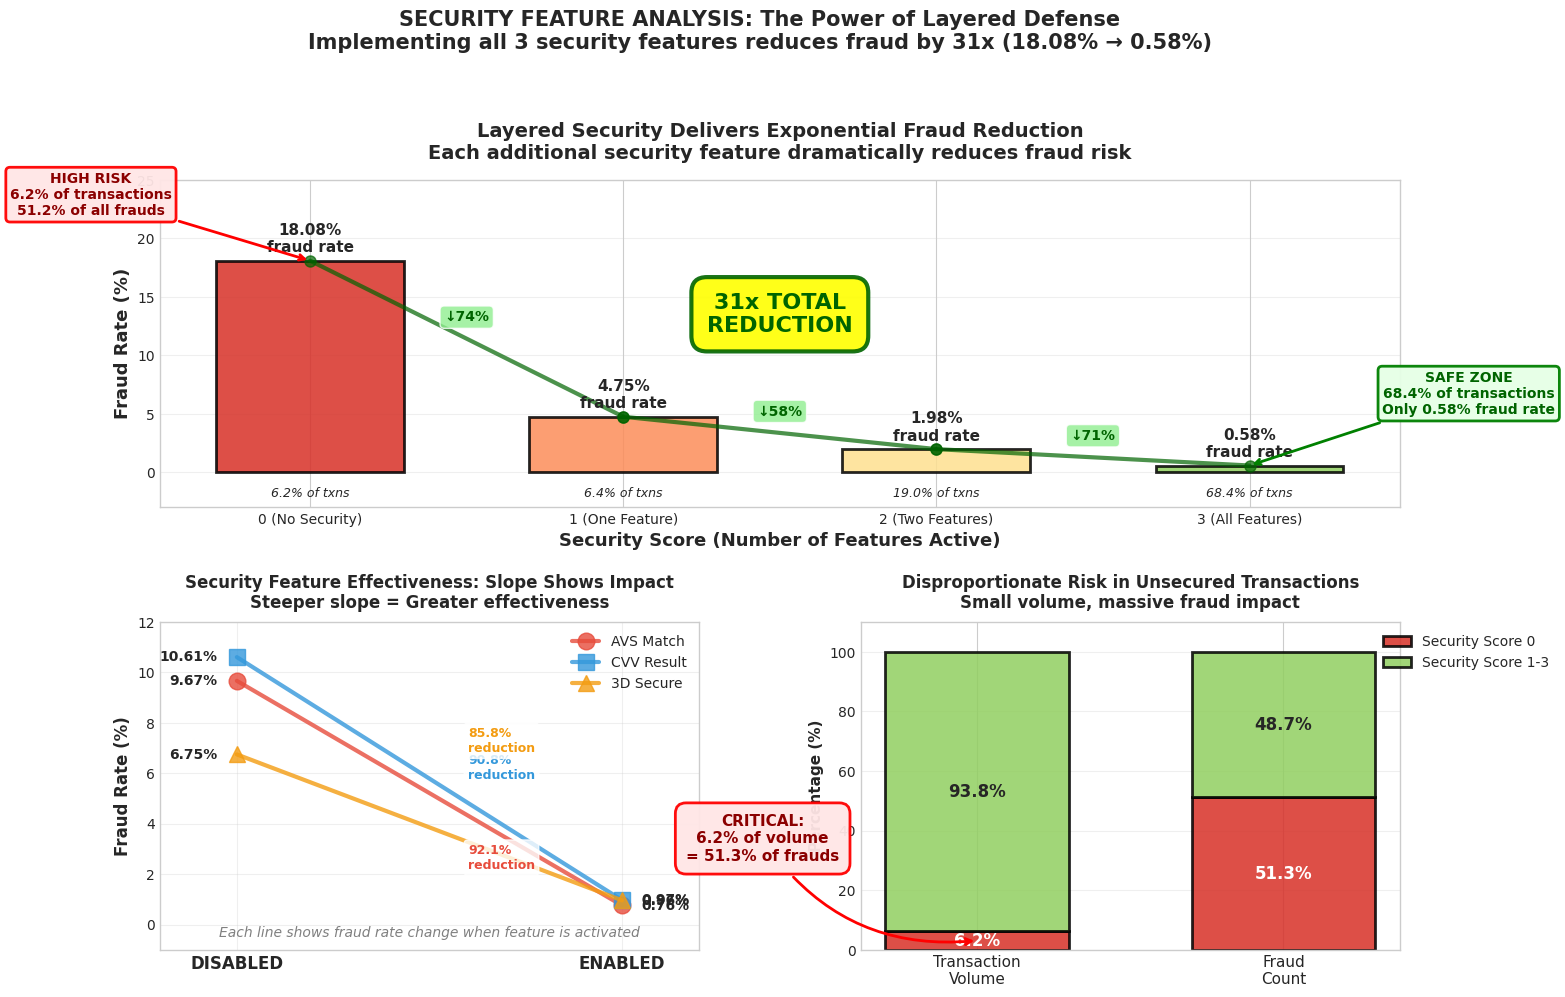

In [19]:
# @title
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Data
security_scores = [0, 1, 2, 3]
fraud_rates = [18.08, 4.75, 1.98, 0.58]
transaction_pcts = [6.2, 6.4, 19.0, 68.4]
fraud_counts = [3390, 911, 1125, 1186]

# Feature effectiveness
features = ['AVS Match', 'CVV Result', '3D Secure']
effectiveness = [92.10, 90.81, 85.81]
disabled_rates = [9.67, 10.61, 6.75]
enabled_rates = [0.76, 0.97, 0.96]

# ========== 1. FIXED: FRAUD RATE DROP WITH STRAIGHT LINES ==========
ax1 = fig.add_subplot(gs[0, :])

# Create bar chart with gradient color
colors = ['#d73027', '#fc8d59', '#fee090', '#91cf60']
bars = ax1.bar(security_scores, fraud_rates, color=colors,
               edgecolor='black', linewidth=2, width=0.6, alpha=0.85)

# Add value labels on bars
for i, (bar, rate, pct) in enumerate(zip(bars, fraud_rates, transaction_pcts)):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.5,
            f'{rate:.2f}%\nfraud rate', ha='center', va='bottom',
            fontsize=11, fontweight='bold')
    ax1.text(bar.get_x() + bar.get_width()/2., -1.2,
            f'{pct:.1f}% of txns', ha='center', va='top',
            fontsize=9, style='italic')

# Draw step-by-step reduction lines between adjacent bars
for i in range(len(security_scores)-1):
    x1, y1 = security_scores[i], fraud_rates[i]
    x2, y2 = security_scores[i+1], fraud_rates[i+1]
    ax1.plot([x1, x2], [y1, y2], 'o-', color='darkgreen', linewidth=3,
             markersize=8, alpha=0.7)

    # Add reduction percentage
    reduction = (y1 - y2) / y1 * 100
    mid_x = (x1 + x2) / 2
    mid_y = (y1 + y2) / 2
    ax1.text(mid_x, mid_y + 1.5, f'↓{reduction:.0f}%', ha='center',
            fontsize=10, fontweight='bold', color='darkgreen',
            bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))

# Add overall reduction callout
ax1.text(1.5, 12, '31x TOTAL\nREDUCTION', fontsize=16, fontweight='bold',
         color='darkgreen', ha='center',
         bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow',
                  alpha=0.9, edgecolor='darkgreen', linewidth=3))

# Add risk callout for Score 0
ax1.annotate('HIGH RISK\n6.2% of transactions\n51.2% of all frauds',
            xy=(0, 18.08), xytext=(-0.7, 22),
            ha='center', fontsize=10, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round', facecolor='#ffe6e6', alpha=0.95,
                     edgecolor='red', linewidth=2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2))

# Add safe zone callout for Score 3
ax1.annotate('SAFE ZONE\n68.4% of transactions\nOnly 0.58% fraud rate',
            xy=(3, 0.58), xytext=(3.7, 5),
            ha='center', fontsize=10, fontweight='bold', color='darkgreen',
            bbox=dict(boxstyle='round', facecolor='#e6ffe6', alpha=0.95,
                     edgecolor='green', linewidth=2),
            arrowprops=dict(arrowstyle='->', color='green', lw=2))

ax1.set_xlabel('Security Score (Number of Features Active)', fontsize=13, fontweight='bold')
ax1.set_ylabel('Fraud Rate (%)', fontsize=13, fontweight='bold')
ax1.set_title('Layered Security Delivers Exponential Fraud Reduction\n' +
              'Each additional security feature dramatically reduces fraud risk',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(security_scores)
ax1.set_xticklabels(['0 (No Security)', '1 (One Feature)',
                     '2 (Two Features)', '3 (All Features)'])
ax1.set_ylim(-3, 25)
ax1.grid(axis='y', alpha=0.3)

# ========== 2. ALTERNATIVE 1: SLOPE VISUALIZATION ==========
ax2 = fig.add_subplot(gs[1, 0])

# Plot each feature as a line from disabled to enabled
colors_feat = ['#e74c3c', '#3498db', '#f39c12']
markers = ['o', 's', '^']

for i, (feature, disabled, enabled, eff, color, marker) in enumerate(
    zip(features, disabled_rates, enabled_rates, effectiveness, colors_feat, markers)):

    # Plot line from disabled (x=0) to enabled (x=1)
    ax2.plot([0, 1], [disabled, enabled], marker=marker, markersize=12,
             linewidth=3, color=color, alpha=0.8, label=feature)

    # Add rate labels
    ax2.text(-0.05, disabled, f'{disabled:.2f}%', ha='right', va='center',
             fontsize=10, fontweight='bold')
    ax2.text(1.05, enabled, f'{enabled:.2f}%', ha='left', va='center',
             fontsize=10, fontweight='bold')

    # Add effectiveness label in middle
    mid_x, mid_y = 0.5, (disabled + enabled) / 2
    ax2.text(mid_x + 0.1, mid_y +3*(i-1), f'{eff:.1f}%\nreduction', ha='left',
             fontsize=9, fontweight='bold', color=color,
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Styling
ax2.set_xlim(-0.2, 1.2)
ax2.set_ylim(-1, 12)
ax2.set_xticks([0, 1])
ax2.set_xticklabels(['DISABLED', 'ENABLED'], fontsize=12, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax2.set_title('Security Feature Effectiveness: Slope Shows Impact\n' +
              'Steeper slope = Greater effectiveness',
              fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper right', framealpha=0.9)
ax2.grid(True, alpha=0.3)

# Add annotation explaining the visualization
ax2.text(0.5, -0.5, 'Each line shows fraud rate change when feature is activated',
         ha='center', fontsize=10, style='italic', color='gray')

# ========== 3. VOLUME vs FRAUD CONCENTRATION (same as before) ==========
ax3 = fig.add_subplot(gs[1, 1])

# Create stacked data showing the disproportionate impact
x = ['Transaction\nVolume', 'Fraud\nCount']
score_0_txn = 6.2
score_123_txn = 93.8
score_0_fraud = (3390 / 6612) * 100  # 51.2%
score_123_fraud = 100 - score_0_fraud  # 48.8%

txn_data = [score_0_txn, score_123_txn]
fraud_data = [score_0_fraud, score_123_fraud]

width = 0.6
x_pos = [0, 1]

# Score 0 (no security) - Red
bars1 = ax3.bar(x_pos, [score_0_txn, score_0_fraud], width,
               label='Security Score 0', color='#d73027', alpha=0.85,
               edgecolor='black', linewidth=2)

# Score 1-3 (some/all security) - Green
bars2 = ax3.bar(x_pos, [score_123_txn, score_123_fraud], width,
               bottom=[score_0_txn, score_0_fraud],
               label='Security Score 1-3', color='#91cf60', alpha=0.85,
               edgecolor='black', linewidth=2)

# Add percentage labels
ax3.text(0, score_0_txn/2, f'{score_0_txn:.1f}%', ha='center', va='center',
        fontsize=12, fontweight='bold', color='white')
ax3.text(0, score_0_txn + score_123_txn/2, f'{score_123_txn:.1f}%',
        ha='center', va='center', fontsize=12, fontweight='bold')
ax3.text(1, score_0_fraud/2, f'{score_0_fraud:.1f}%', ha='center', va='center',
        fontsize=12, fontweight='bold', color='white')
ax3.text(1, score_0_fraud + score_123_fraud/2, f'{score_123_fraud:.1f}%',
        ha='center', va='center', fontsize=12, fontweight='bold')

# Add dramatic callout
ax3.annotate(f'CRITICAL:\n{score_0_txn:.1f}% of volume\n= {score_0_fraud:.1f}% of frauds',
            xy=(0, score_0_txn/2), xytext=(-0.7, 30),
            ha='center', fontsize=11, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='#ffe6e6',
                     alpha=0.95, edgecolor='red', linewidth=2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2,
                          connectionstyle="arc3,rad=0.3"))

ax3.set_xticks(x_pos)
ax3.set_xticklabels(x, fontsize=11)
ax3.set_ylabel('Percentage (%)', fontsize=11, fontweight='bold')
ax3.set_title('Disproportionate Risk in Unsecured Transactions\n' +
              'Small volume, massive fraud impact',
              fontsize=12, fontweight='bold', pad=10)
ax3.legend(loc='upper right', framealpha=0.9, bbox_to_anchor=(1.3, 1))
ax3.set_ylim(0, 110)
ax3.grid(axis='y', alpha=0.3)

# Main title
fig.suptitle('SECURITY FEATURE ANALYSIS: The Power of Layered Defense\n' +
             'Implementing all 3 security features reduces fraud by 31x (18.08% → 0.58%)',
             fontsize=15, fontweight='bold', y=1.05)

plt.tight_layout()
plt.show()

/tmp/ipython-input-1437579889.py:44: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  circle = plt.Circle((mid_x, y), radius=0.015 * bubble_size,


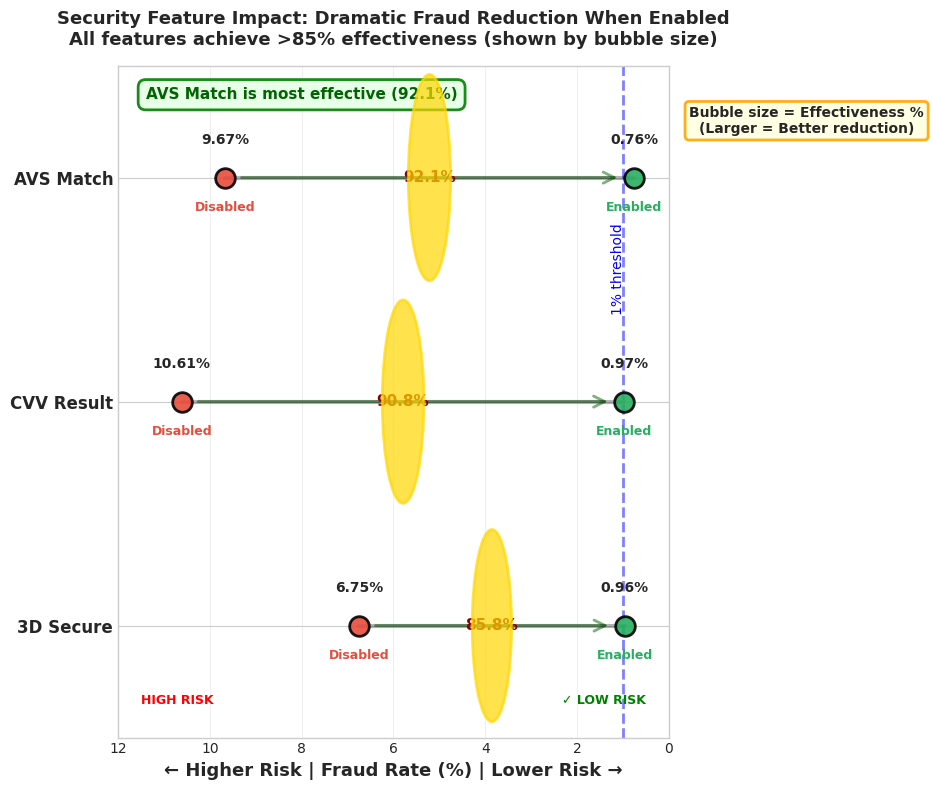

In [20]:
# @title
# ========== IMPROVED ALTERNATIVE 2: HORIZONTAL WITH INVERTED X-AXIS ==========
fig, ax = plt.subplots(figsize=(10, 8))

# Set up positions for features
y_positions = [0, 1, 2]
feature_names = ['3D Secure', 'CVV Result', 'AVS Match']

# Reorder data to match
disabled_rates_reorder = [6.75, 10.61, 9.67]
enabled_rates_reorder = [0.96, 0.97, 0.76]
effectiveness_reorder = [85.81, 90.81, 92.10]

# Plot horizontal lines and points
for i, (y, disabled, enabled, eff, feature) in enumerate(
    zip(y_positions, disabled_rates_reorder, enabled_rates_reorder,
        effectiveness_reorder, feature_names)):

    # Plot horizontal line
    ax.plot([enabled, disabled], [y, y], 'k-', linewidth=3, alpha=0.3)

    # Plot disabled point (left side due to inverted axis, red)
    ax.scatter(disabled, y, s=200, color='#e74c3c', alpha=0.9,
              edgecolor='black', linewidth=2, zorder=3)
    ax.text(disabled, y + 0.15, f'{disabled:.2f}%', ha='center',
           fontsize=10, fontweight='bold')
    ax.text(disabled, y - 0.15, 'Disabled', ha='center', fontsize=9,
           color='#e74c3c', fontweight='bold')

    # Plot enabled point (right side due to inverted axis, green)
    ax.scatter(enabled, y, s=200, color='#27ae60', alpha=0.9,
              edgecolor='black', linewidth=2, zorder=3)
    ax.text(enabled, y + 0.15, f'{enabled:.2f}%', ha='center',
           fontsize=10, fontweight='bold')
    ax.text(enabled, y - 0.15, 'Enabled', ha='center', fontsize=9,
           color='#27ae60', fontweight='bold')

    # Add effectiveness bubble in the middle
    mid_x = (disabled + enabled) / 2
    # Bubble size proportional to effectiveness (scaled x10 for visibility)
    bubble_size = eff / 3  # Increased scale factor

    # Draw bubble
    circle = plt.Circle((mid_x, y), radius=0.015 * bubble_size,
                        color='gold', alpha=0.7, edgecolor='darkorange',
                        linewidth=2, zorder=4)
    ax.add_patch(circle)

    # Add effectiveness percentage in bubble
    ax.text(mid_x, y, f'{eff:.1f}%', ha='center', va='center',
           fontsize=11, fontweight='bold', color='darkred')

    # Add arrow showing reduction direction
    arrow = patches.FancyArrowPatch((disabled - 0.3, y), (enabled + 0.3, y),
                                   arrowstyle='->', mutation_scale=20,
                                   color='darkgreen', alpha=0.5, linewidth=2)
    ax.add_patch(arrow)

# Add legend for bubble size
ax.text(-3, 2.2, 'Bubble size = Effectiveness %\n(Larger = Better reduction)',
       fontsize=10, fontweight='bold', ha='center',
       bbox=dict(boxstyle='round', facecolor='lightyellow',
                alpha=0.9, edgecolor='orange', linewidth=2))

# Styling
ax.set_xlim(12, 0)  # INVERTED: 12 at origin, 0 at right
ax.set_ylim(-0.5, 2.5)
ax.set_xlabel('← Higher Risk | Fraud Rate (%) | Lower Risk →', fontsize=13, fontweight='bold')
ax.set_yticks(y_positions)
ax.set_yticklabels(feature_names, fontsize=12, fontweight='bold')
ax.set_title('Security Feature Impact: Dramatic Fraud Reduction When Enabled\n' +
            'All features achieve >85% effectiveness (shown by bubble size)',
            fontsize=13, fontweight='bold', pad=15)
ax.grid(axis='x', alpha=0.3)

# Add visual guide for axis interpretation
ax.text(11.5, -0.35, 'HIGH RISK', ha='left', fontsize=9,
       fontweight='bold', color='red')
ax.text(0.5, -0.35, '✓ LOW RISK', ha='right', fontsize=9,
       fontweight='bold', color='green')

# Add overall insight
ax.text(8, 2.35, 'AVS Match is most effective (92.1%)', ha='center',
       fontsize=11, fontweight='bold', color='darkgreen',
       bbox=dict(boxstyle='round,pad=0.5', facecolor='#e6ffe6',
                alpha=0.9, edgecolor='green', linewidth=2))

# Add vertical line at 1% threshold
ax.axvline(x=1, color='blue', linestyle='--', alpha=0.5, linewidth=2)
ax.text(1.1, 1.4, '1% threshold', ha='center', fontsize=10,
       color='blue', rotation=90)

plt.tight_layout()
plt.show()

---
<a name='geographic'></a>
## 6. Geographic & User Behavior Analysis

### 📋 Business Question: What geographic patterns exist in fraud distribution, and how does cross-border activity affect risk?

**Top Countries Analysis:**
- Find top 10 countries by transaction volume
- For each country, calculate:
  - Transaction count
  - Fraud count
  - Fraud rate (%)
- Sort by fraud rate descending

**Cross-Border Risk Assessment:**
- Create binary flag: `is_cross_border` (1 if country ≠ bin_country, else 0)
- Compare fraud rates between domestic and cross-border transactions
- Calculate percentage of cross-border transactions that are fraudulent

**High-Risk Country Identification:**
- Find countries with fraud rate > 5% AND at least 100 transactions
- Count how many such high-risk countries exist

In [21]:
# @title
# 1

metric = {
    'transaction_id': 'count',
    'is_fraud': ['sum', lambda x: x.sum()/x.count()*100]
}

by_country_df = df.groupby('country').agg(metric).reset_index()
by_country_df.columns = ['country','transaction_count', 'fraud_count', 'fraud_rate_%']
df_top10 = by_country_df.nlargest(10, 'transaction_count').sort_values(by='fraud_rate_%', ascending=False)

print("="*60)
print("🌍 TOP 10 COUNTRIES BY TRANSACTION VOLUME")
print("="*60)
print(df_top10.to_string(index=False))

# 2

df['is_cross_border'] = df.apply(lambda x: [1, 0][x['country']==x['bin_country']], axis=1)

metric = {
    'transaction_id': 'count',
    'is_fraud': lambda x: x.sum()/x.count()*100
}

cross_border_fraud_analysis = df.groupby('is_cross_border').agg(metric).reset_index()

cross_border_fraud_analysis['fraud_count'] = df.groupby('is_cross_border')['is_fraud'].sum().values
cross_border_fraud_analysis.columns = ['is_cross_border', 'transaction_count','fraud_rate_%', 'fraud_count']

print("\n"+"="*60)
print("🌐 CROSS-BORDER TRANSACTION RISK")
print("="*60)

print("Domestic vs Cross-Border Comparison:")
print(cross_border_fraud_analysis.to_string(index=False))

domestic_fraud_rate = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==0]['fraud_rate_%'].values[0]
cross_border_fraud_rate = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==1]['fraud_rate_%'].values[0]

print(f"\nCross-border transactions are {cross_border_fraud_rate/domestic_fraud_rate:.1f}x riskier than domestic")

# 3

by_country_df = by_country_df.sort_values(by='fraud_rate_%', ascending=False)
high_risk_countries = by_country_df[(by_country_df['fraud_rate_%']>5) & (by_country_df['transaction_count']>=100)]

print("\n"+"="*60)
print("⚠️ HIGH-RISK COUNTRY IDENTIFICATION")
print("="*60)

# Original criteria (5% threshold)
high_risk_strict = by_country_df[(by_country_df['fraud_rate_%'] > 5) &
                                  (by_country_df['transaction_count'] >= 100)]

print(f"Countries with fraud rate > 5% AND ≥100 transactions: {len(high_risk_strict)}")

# Adjusted criteria (2% threshold for analysis)
high_risk_adjusted = by_country_df[(by_country_df['fraud_rate_%'] > 2) &
                                    (by_country_df['transaction_count'] >= 100)]

print(f"Countries with fraud rate > 2% AND ≥100 transactions: {len(high_risk_adjusted)}")
print("\nCountries above 2% fraud threshold:")
print(high_risk_adjusted.to_string(index=False))

# Compare to overall fraud rate
overall_fraud_rate = df['is_fraud'].mean() * 100
print(f"\nOverall fraud rate: {overall_fraud_rate:.2f}%")
print(f"Highest country fraud rate: {by_country_df['fraud_rate_%'].max():.2f}% ({by_country_df.iloc[0]['country']} =Turkey)")

🌍 TOP 10 COUNTRIES BY TRANSACTION VOLUME
country  transaction_count  fraud_count  fraud_rate_%
     TR              30074          843      2.803086
     RO              29501          709      2.403308
     PL              29965          701      2.339396
     ES              28885          668      2.312619
     US              32430          748      2.306506
     FR              30343          664      2.188314
     IT              28615          607      2.121265
     GB              30602          648      2.117509
     NL              30220          539      1.783587
     DE              29060          485      1.668961

🌐 CROSS-BORDER TRANSACTION RISK
Domestic vs Cross-Border Comparison:
 is_cross_border  transaction_count  fraud_rate_%  fraud_count
               0             275965      1.426268         3936
               1              23730     11.276865         2676

Cross-border transactions are 7.9x riskier than domestic

⚠️ HIGH-RISK COUNTRY IDENTIFICATION
Countries w

### 💡 Key Findings

- **Cross-border transactions are the major risk**: 11.28% fraud rate vs 1.43% domestic - a 7.9x increase
- **No extreme geographic hotspots**: All countries hover between 1.67-2.80% fraud rate, close to overall average (2.21%)
- **Turkey leads but marginally**: Highest fraud rate at 2.80%, only 0.6 percentage points above average
- **Cross-border volume is limited but dangerous**: Only 7.9% of transactions but accounts for 40% of all fraud
- **5% threshold too strict**: Zero countries exceed 5% fraud rate, indicating relatively uniform global risk

/tmp/ipython-input-2645706566.py:145: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


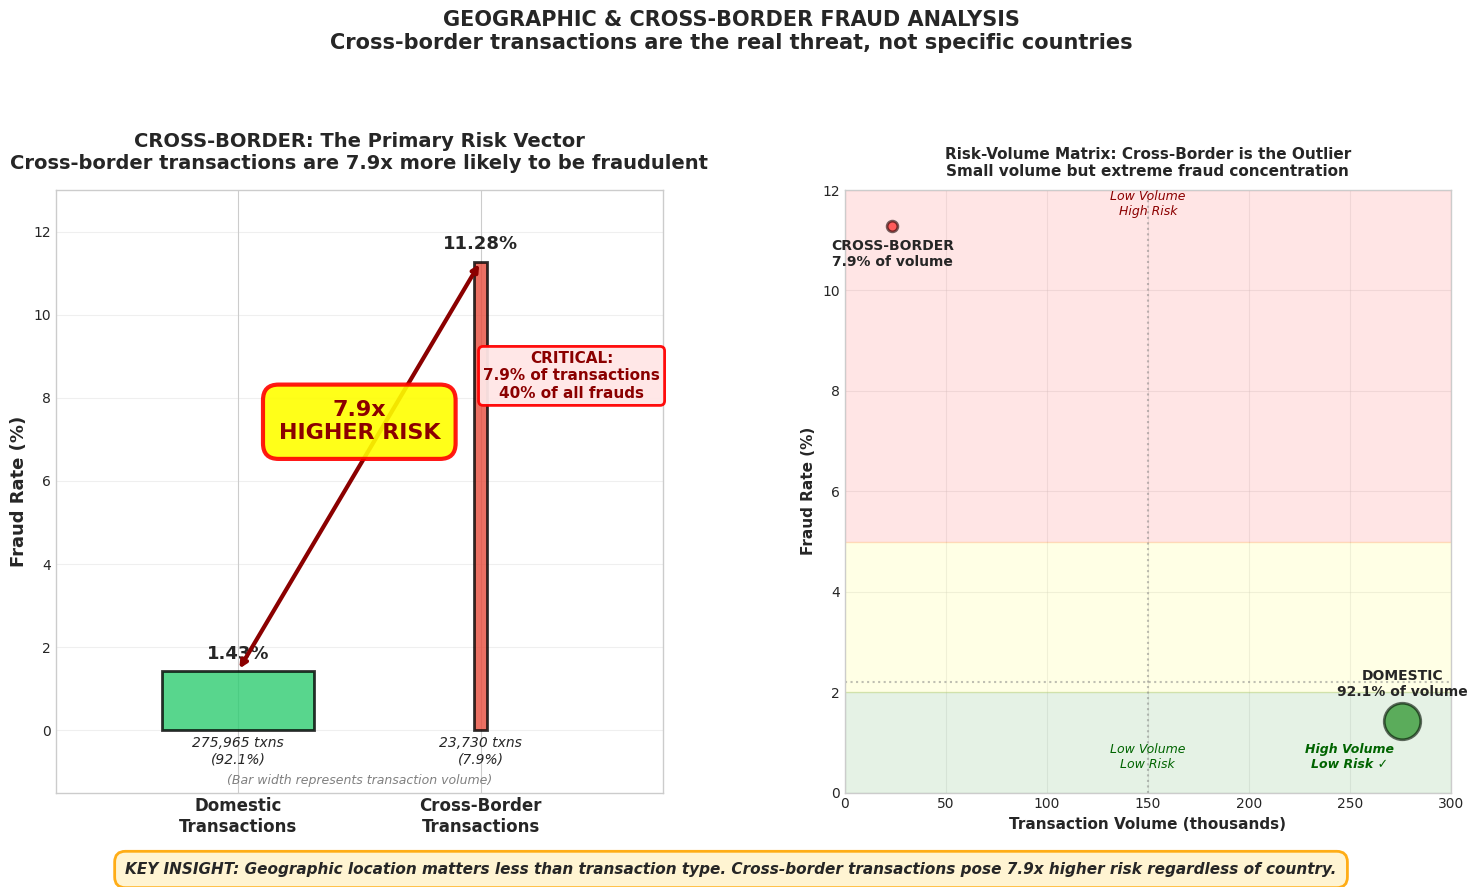

In [22]:
# @title
# Set style
sns.set_style("whitegrid")
fig = plt.figure(figsize=(18, 18))
gs = fig.add_gridspec(2, 2, hspace=0.3, wspace=0.3)

# Data preparation
countries = by_country_df['country']
fraud_rates = by_country_df['fraud_rate_%']
transaction_counts =  by_country_df['transaction_count']

# Cross-border data
domestic_txn = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==0]['transaction_count'].values[0]
cross_border_txn = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==1]['transaction_count'].values[0]
domestic_fraud_count = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==0]['fraud_count'].values[0]
cross_border_fraud_count = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==1]['fraud_count'].values[0]


# ========== 1. CROSS-BORDER RISK: THE MAIN STORY ==========
ax1 = fig.add_subplot(gs[0, 0])

# Create dramatic comparison
categories = ['Domestic\nTransactions', 'Cross-Border\nTransactions']
rates = [domestic_fraud_rate, cross_border_fraud_rate]
volumes = [domestic_txn, cross_border_txn]

# Create bars with size representing volume
x_pos = [0.3, 0.7]
width_scale = 0.25

# Normalize widths to show volume difference
max_volume = max(volumes)
widths = [w/max_volume * width_scale for w in volumes]

# Create bars
bars = []
for i, (x, rate, width, vol) in enumerate(zip(x_pos, rates, widths, volumes)):
    color = '#2ecc71' if i == 0 else '#e74c3c'
    bar = ax1.bar(x, rate, width=width, color=color, alpha=0.8,
                   edgecolor='black', linewidth=2)
    bars.append(bar)

    # Add volume label below
    ax1.text(x, -0.8, f'{vol:,} txns\n({vol/sum(volumes)*100:.1f}%)',
             ha='center', fontsize=10, style='italic')

    # Add fraud rate on top
    ax1.text(x, rate + 0.3, f'{rate:.2f}%', ha='center',
             fontsize=13, fontweight='bold')

# Add multiplier annotation
ax1.annotate('', xy=(x_pos[1], rates[1]), xytext=(x_pos[0], rates[0]),
            arrowprops=dict(arrowstyle='<->', color='darkred', lw=3))
ax1.text(0.5, 7, '7.9x\nHIGHER RISK', fontsize=16, fontweight='bold',
         ha='center', color='darkred',
         bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow',
                  alpha=0.9, edgecolor='red', linewidth=3))

# Add fraud distribution callout
total_fraud = domestic_fraud_count + cross_border_fraud_count
cross_border_fraud_pct = (cross_border_fraud_count / total_fraud) * 100

ax1.text(0.85, 8, f'CRITICAL:\n7.9% of transactions\n{cross_border_fraud_pct:.0f}% of all frauds',
         ha='center', fontsize=11, fontweight='bold', color='darkred',
         bbox=dict(boxstyle='round', facecolor='#ffe6e6', alpha=0.95,
                  edgecolor='red', linewidth=2))

# Styling
ax1.set_xlim(0, 1)
ax1.set_ylim(-1.5, 13)
ax1.set_ylabel('Fraud Rate (%)', fontsize=13, fontweight='bold')
ax1.set_title('CROSS-BORDER: The Primary Risk Vector\n' +
              'Cross-border transactions are 7.9x more likely to be fraudulent',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_xticks(x_pos)
ax1.set_xticklabels(categories, fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Add note about bar width
ax1.text(0.5, -1.3, '(Bar width represents transaction volume)',
         ha='center', fontsize=9, style='italic', color='gray')



# ========== 3. VOLUME-RISK MATRIX ==========
ax3 = fig.add_subplot(gs[0, 1])
overall_avg = 2.21

# Create proportional area chart
# Domestic bubble
domestic_area = np.sqrt(domestic_txn) / 20  # Scale for visibility
ax3.scatter(domestic_txn/1000, domestic_fraud_rate, s=domestic_area**2,
           color='green', alpha=0.6, edgecolor='black', linewidth=2,
           label='Domestic')
ax3.text(domestic_txn/1000, domestic_fraud_rate + 0.5, 'DOMESTIC\n92.1% of volume',
         ha='center', fontsize=10, fontweight='bold')

# Cross-border bubble
cross_border_area = np.sqrt(cross_border_txn) / 20
ax3.scatter(cross_border_txn/1000, cross_border_fraud_rate, s=cross_border_area**2,
           color='red', alpha=0.6, edgecolor='black', linewidth=2,
           label='Cross-Border')
ax3.text(cross_border_txn/1000, cross_border_fraud_rate - 0.8, 'CROSS-BORDER\n7.9% of volume',
         ha='center', fontsize=10, fontweight='bold')

# Add risk zones
ax3.axhspan(0, 2, alpha=0.1, color='green', label='Low Risk')
ax3.axhspan(2, 5, alpha=0.1, color='yellow')
ax3.axhspan(5, 12, alpha=0.1, color='red', label='High Risk')

# Add quadrant lines
ax3.axhline(y=overall_avg, color='gray', linestyle=':', alpha=0.5)
ax3.axvline(x=150, color='gray', linestyle=':', alpha=0.5)

# Annotations
ax3.text(150, 11.5, 'Low Volume\nHigh Risk', ha='center', fontsize=9,
         style='italic', color='darkred')
ax3.text(150, 0.5, 'Low Volume\nLow Risk', ha='center', fontsize=9,
         style='italic', color='darkgreen')
ax3.text(250, 0.5, 'High Volume\nLow Risk ✓', ha='center', fontsize=9,
         style='italic', color='darkgreen', fontweight='bold')

# Styling
ax3.set_xlabel('Transaction Volume (thousands)', fontsize=11, fontweight='bold')
ax3.set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
ax3.set_title('Risk-Volume Matrix: Cross-Border is the Outlier\n' +
              'Small volume but extreme fraud concentration',
              fontsize=11, fontweight='bold', pad=10)
ax3.set_xlim(0, 300)
ax3.set_ylim(0, 12)
ax3.grid(True, alpha=0.3)

# Add insight text
fig.text(0.5, 0.5, 'KEY INSIGHT: Geographic location matters less than transaction type. ' +
         'Cross-border transactions pose 7.9x higher risk regardless of country.',
         ha='center', fontsize=11, fontweight='bold', style='italic',
         bbox=dict(boxstyle='round,pad=0.7', facecolor='#fff3cd',
                  alpha=0.9, edgecolor='orange', linewidth=2))

# Main title
fig.suptitle('GEOGRAPHIC & CROSS-BORDER FRAUD ANALYSIS\n' +
             'Cross-border transactions are the real threat, not specific countries',
             fontsize=15, fontweight='bold', y=0.98)

plt.tight_layout()
plt.show()

/tmp/ipython-input-3739112506.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


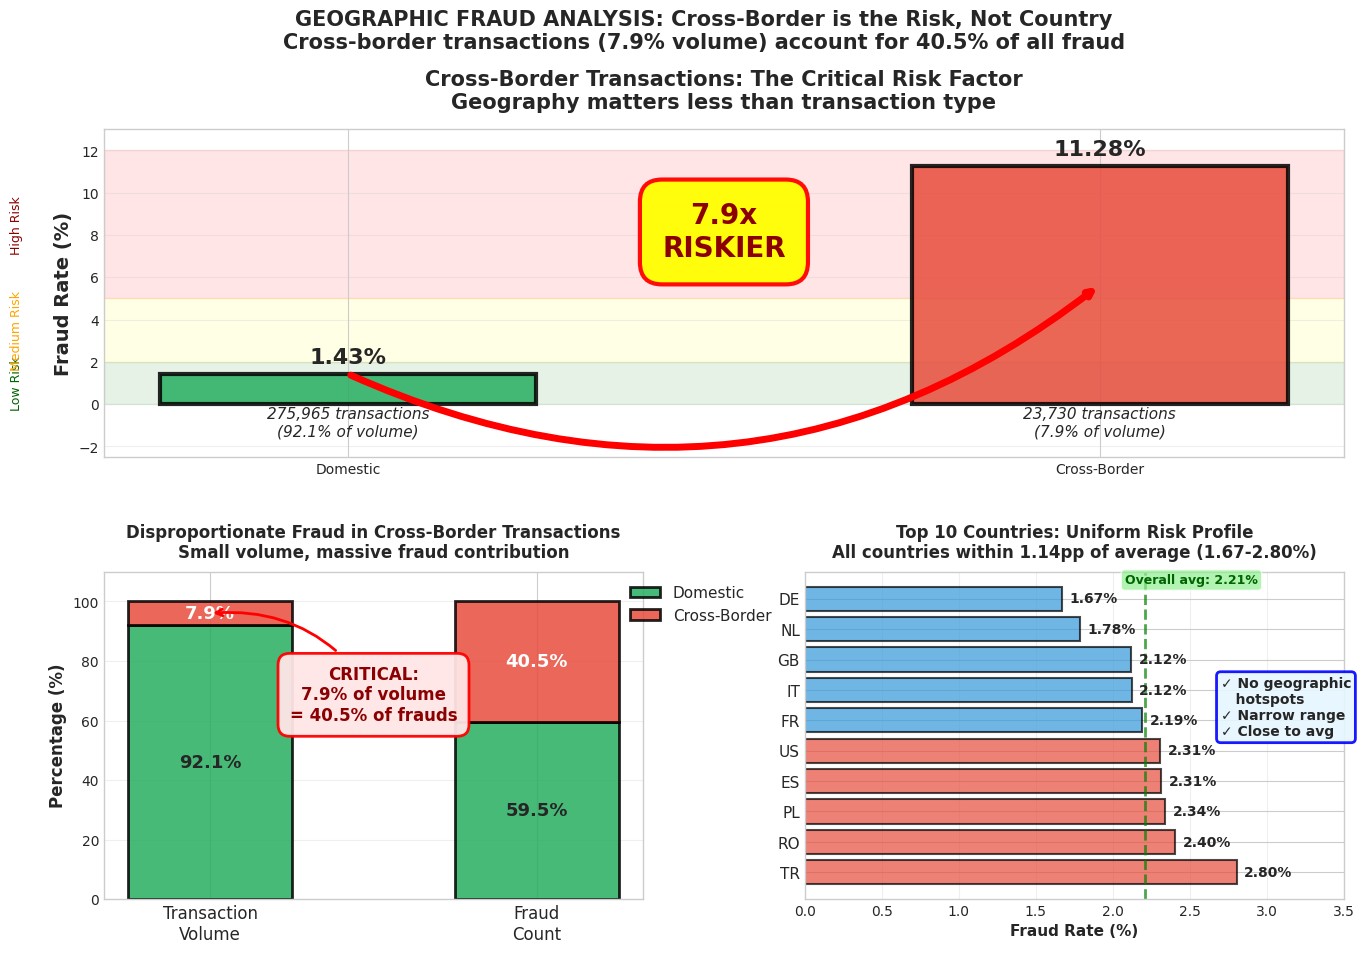

In [23]:
# @title
# Set style
sns.set_style("whitegrid")
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 2, hspace=0.35, wspace=0.3)

# Data preparation
countries = by_country_df['country']
fraud_rates = by_country_df['fraud_rate_%']
transaction_counts =  by_country_df['transaction_count']

# Cross-border data
domestic_txn = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==0]['transaction_count'].values[0]
cross_border_txn = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==1]['transaction_count'].values[0]
domestic_fraud_count = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==0]['fraud_count'].values[0]
cross_border_fraud_count = cross_border_fraud_analysis[cross_border_fraud_analysis['is_cross_border']==1]['fraud_count'].values[0]

total_txn = domestic_txn + cross_border_txn
total_fraud = domestic_fraud_count + cross_border_fraud_count

overall_fraud_rate = 2.21

# ========== 1. HERO CHART: CROSS-BORDER RISK COMPARISON ==========
ax1 = fig.add_subplot(gs[0, :])

# Create side-by-side comparison with dramatic visual difference
categories = ['Domestic', 'Cross-Border']
fraud_rates_compare = [domestic_fraud_rate, cross_border_fraud_rate]
colors = ['#27ae60', '#e74c3c']

bars = ax1.bar(categories, fraud_rates_compare, color=colors,
               alpha=0.85, edgecolor='black', linewidth=3, width=0.5)

# Add value labels on bars
for bar, rate in zip(bars, fraud_rates_compare):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.3,
            f'{rate:.2f}%', ha='center', va='bottom',
            fontsize=16, fontweight='bold')

# Add dramatic multiplier annotation
ax1.annotate('', xy=(1, cross_border_fraud_rate/2), xytext=(0, domestic_fraud_rate),
            arrowprops=dict(arrowstyle='->', color='red', lw=5,
                          connectionstyle="arc3,rad=0.3"))
ax1.text(0.5, 7, '7.9x\nRISKIER', fontsize=20, fontweight='bold',
         color='darkred', ha='center',
         bbox=dict(boxstyle='round,pad=0.8', facecolor='yellow',
                  alpha=0.95, edgecolor='red', linewidth=3))

# Add transaction volume info below bars
ax1.text(0, -1.5, f'{domestic_txn:,} transactions\n(92.1% of volume)',
        ha='center', fontsize=11, style='italic')
ax1.text(1, -1.5, f'{cross_border_txn:,} transactions\n(7.9% of volume)',
        ha='center', fontsize=11, style='italic')

# Add risk zones
ax1.axhspan(0, 2, alpha=0.1, color='green', zorder=0)
ax1.axhspan(2, 5, alpha=0.1, color='yellow', zorder=0)
ax1.axhspan(5, 12, alpha=0.1, color='red', zorder=0)

ax1.text(-0.45, 1, 'Low Risk', fontsize=9, color='darkgreen', rotation=90, va='center')
ax1.text(-0.45, 3.5, 'Medium Risk', fontsize=9, color='orange', rotation=90, va='center')
ax1.text(-0.45, 8.5, 'High Risk', fontsize=9, color='darkred', rotation=90, va='center')

ax1.set_ylabel('Fraud Rate (%)', fontsize=14, fontweight='bold')
ax1.set_title('Cross-Border Transactions: The Critical Risk Factor\n' +
              'Geography matters less than transaction type',
              fontsize=15, fontweight='bold', pad=15)
ax1.set_ylim(-2.5, 13)
ax1.grid(axis='y', alpha=0.3)

# ========== 2. VOLUME vs FRAUD DISPROPORTIONALITY ==========
ax2 = fig.add_subplot(gs[1, 0])

# Similar to previous disproportionate visualization
x_labels = ['Transaction\nVolume', 'Fraud\nCount']
domestic_vol_pct = (domestic_txn / total_txn) * 100  # 92.1%
cross_border_vol_pct = (cross_border_txn / total_txn) * 100  # 7.9%
domestic_fraud_pct = (domestic_fraud_count / total_fraud) * 100  # 59.5%
cross_border_fraud_pct = (cross_border_fraud_count / total_fraud) * 100  # 40.5%

x_pos = [0, 1]
width = 0.5

# Domestic
bars1 = ax2.bar(x_pos, [domestic_vol_pct, domestic_fraud_pct], width,
               label='Domestic', color='#27ae60', alpha=0.85,
               edgecolor='black', linewidth=2)

# Cross-border
bars2 = ax2.bar(x_pos, [cross_border_vol_pct, cross_border_fraud_pct], width,
               bottom=[domestic_vol_pct, domestic_fraud_pct],
               label='Cross-Border', color='#e74c3c', alpha=0.85,
               edgecolor='black', linewidth=2)

# Add percentage labels
ax2.text(0, domestic_vol_pct/2, f'{domestic_vol_pct:.1f}%',
        ha='center', va='center', fontsize=13, fontweight='bold')
ax2.text(0, domestic_vol_pct + cross_border_vol_pct/2, f'{cross_border_vol_pct:.1f}%',
        ha='center', va='center', fontsize=13, fontweight='bold', color='white')
ax2.text(1, domestic_fraud_pct/2, f'{domestic_fraud_pct:.1f}%',
        ha='center', va='center', fontsize=13, fontweight='bold')
ax2.text(1, domestic_fraud_pct + cross_border_fraud_pct/2, f'{cross_border_fraud_pct:.1f}%',
        ha='center', va='center', fontsize=13, fontweight='bold', color='white')

# Add dramatic callout
ax2.annotate(f'CRITICAL:\n7.9% of volume\n= 40.5% of frauds',
            xy=(0, domestic_vol_pct + cross_border_vol_pct/2),
            xytext=(0.5, 60),
            ha='center', fontsize=12, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='#ffe6e6',
                     alpha=0.95, edgecolor='red', linewidth=2),
            arrowprops=dict(arrowstyle='->', color='red', lw=2,
                          connectionstyle="arc3,rad=0.3"))

ax2.set_xticks(x_pos)
ax2.set_xticklabels(x_labels, fontsize=12)
ax2.set_ylabel('Percentage (%)', fontsize=12, fontweight='bold')
ax2.set_title('Disproportionate Fraud in Cross-Border Transactions\n' +
              'Small volume, massive fraud contribution',
              fontsize=12, fontweight='bold', pad=10)
ax2.legend(loc='upper left', bbox_to_anchor=(0.95, 1), framealpha=0.9, fontsize=11)
ax2.set_ylim(0, 110)
ax2.grid(axis='y', alpha=0.3)

# ========== 3. TOP 10 COUNTRIES: NO EXTREME OUTLIERS ==========
ax3 = fig.add_subplot(gs[1, 1])

# Create horizontal bar chart
y_pos = np.arange(len(countries))
colors_countries = ['#e74c3c' if rate > overall_fraud_rate else '#3498db'
                    for rate in fraud_rates]

bars = ax3.barh(y_pos, fraud_rates, color=colors_countries,
                alpha=0.7, edgecolor='black', linewidth=1.5)

# Add value labels
for i, (bar, rate) in enumerate(zip(bars, fraud_rates)):
    width = bar.get_width()
    ax3.text(width + 0.05, i, f'{rate:.2f}%', va='center',
            fontsize=10, fontweight='bold')

# Add overall average line
ax3.axvline(x=overall_fraud_rate, color='green', linestyle='--',
           linewidth=2, alpha=0.7)
ax3.text(overall_fraud_rate+0.3, len(countries)-0.5, f'Overall avg: {overall_fraud_rate:.2f}%',
        ha='center', fontsize=9, color='darkgreen', fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.7))

ax3.set_yticks(y_pos)
ax3.set_yticklabels(countries, fontsize=11)
ax3.set_xlabel('Fraud Rate (%)', fontsize=11, fontweight='bold')
ax3.set_title('Top 10 Countries: Uniform Risk Profile\n' +
              'All countries within 1.14pp of average (1.67-2.80%)',
              fontsize=12, fontweight='bold', pad=10)
ax3.set_xlim(0, 3.5)
ax3.grid(axis='x', alpha=0.3)

# Add insight annotation
ax3.text(2.7, 4.5, '✓ No geographic\n   hotspots\n✓ Narrow range\n✓ Close to avg',
        fontsize=10, fontweight='bold',
        bbox=dict(boxstyle='round', facecolor='#e6f7ff',
                 alpha=0.9, edgecolor='blue', linewidth=2))

# Main title
fig.suptitle('GEOGRAPHIC FRAUD ANALYSIS: Cross-Border is the Risk, Not Country\n' +
             'Cross-border transactions (7.9% volume) account for 40.5% of all fraud',
             fontsize=15, fontweight='bold', y=1)

plt.tight_layout()
plt.show()

/tmp/ipython-input-2189266743.py:29: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  total_circle = Circle((2, 5), radius=1.5, color=color_total, alpha=0.7,
/tmp/ipython-input-2189266743.py:38: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  domestic_circle = Circle((5, 6.5), radius=domestic_radius, color=color_domestic,
/tmp/ipython-input-2189266743.py:48: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  cross_circle = Circle((5, 3.5), radius=cross_radius, color=color_cross,


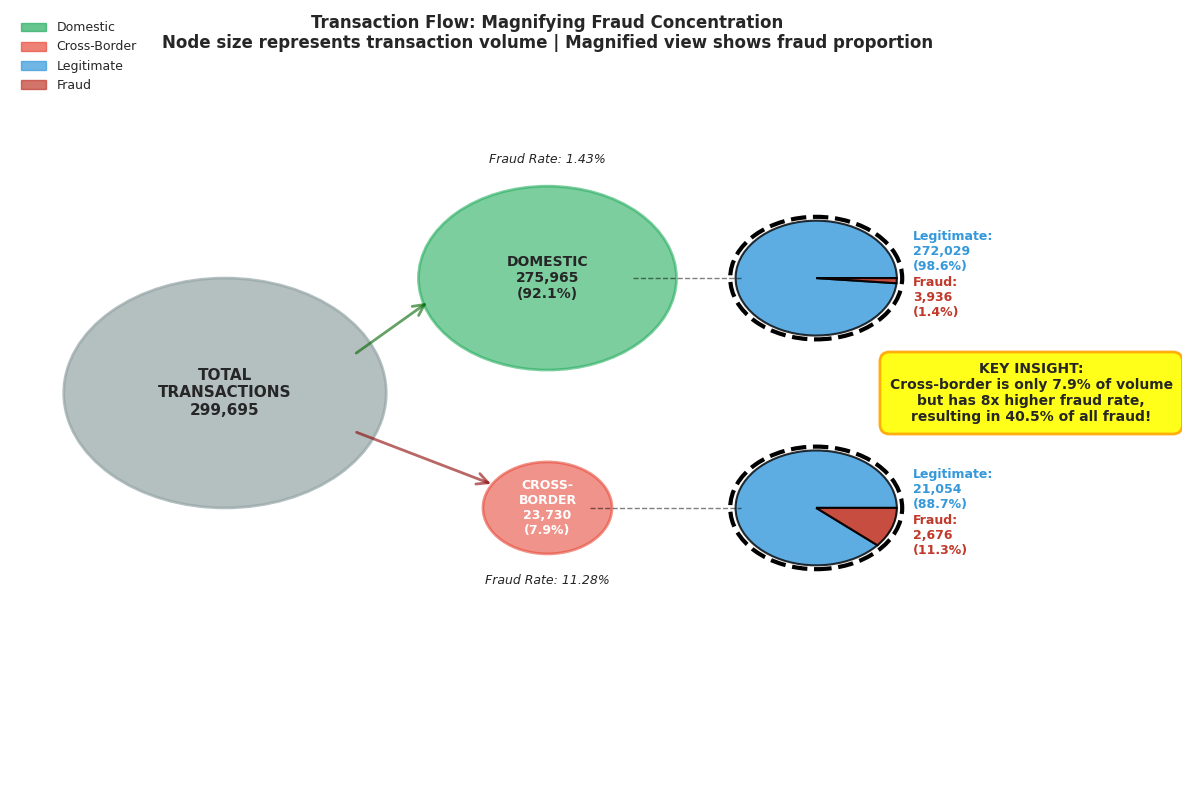

In [37]:
# @title
from matplotlib.patches import Circle

# ========== 3. FLOW CHART WITH MAGNIFYING EFFECT ==========
fig, ax = plt.subplots(figsize=(12, 8))
ax.set_xlim(0, 10)
ax.set_ylim(0, 10)
ax.axis('off')

# Data
total_txn = 299695
domestic_txn = 275965
cross_border_txn = 23730
domestic_legit = 272029
domestic_fraud = 3936
cross_legit = 21054
cross_fraud = 2676

# Colors
color_total = '#95a5a6'
color_domestic = '#27ae60'
color_cross = '#e74c3c'
color_legit = '#3498db'
color_fraud = '#c0392b'

# ========== LEVEL 1: TOTAL TRANSACTIONS ==========
# Main circle (total transactions)
total_circle = Circle((2, 5), radius=1.5, color=color_total, alpha=0.7,
                      edgecolor='black', linewidth=2)
ax.add_patch(total_circle)
ax.text(2, 5, f'TOTAL\nTRANSACTIONS\n{total_txn:,}',
        ha='center', va='center', fontsize=11, fontweight='bold')

# ========== LEVEL 2: DOMESTIC vs CROSS-BORDER ==========
# Domestic (larger circle)
domestic_radius = 1.2
domestic_circle = Circle((5, 6.5), radius=domestic_radius, color=color_domestic,
                         alpha=0.6, edgecolor='black', linewidth=2)
ax.add_patch(domestic_circle)
ax.text(5, 6.5, f'DOMESTIC\n{domestic_txn:,}\n(92.1%)',
        ha='center', va='center', fontsize=10, fontweight='bold')
ax.text(5, 8, f'Fraud Rate: {(domestic_fraud/domestic_txn*100):.2f}%',
        ha='center', fontsize=9, style='italic')

# Cross-border (smaller circle)
cross_radius = 0.6
cross_circle = Circle((5, 3.5), radius=cross_radius, color=color_cross,
                      alpha=0.6, edgecolor='black', linewidth=2)
ax.add_patch(cross_circle)
ax.text(5, 3.5, f'CROSS-\nBORDER\n{cross_border_txn:,}\n(7.9%)',
        ha='center', va='center', fontsize=9, fontweight='bold', color='white')
ax.text(5, 2.5, f'Fraud Rate: {(cross_fraud/cross_border_txn*100):.2f}%',
        ha='center', fontsize=9, style='italic')

# Arrows from total to domestic/cross
arrow1 = FancyArrowPatch((3.2, 5.5), (3.9, 6.2),
                        arrowstyle='->', mutation_scale=20, linewidth=2,
                        color='darkgreen', alpha=0.6)
ax.add_patch(arrow1)

arrow2 = FancyArrowPatch((3.2, 4.5), (4.5, 3.8),
                        arrowstyle='->', mutation_scale=20, linewidth=2,
                        color='darkred', alpha=0.6)
ax.add_patch(arrow2)

# ========== LEVEL 3: MAGNIFIED FRAUD BREAKDOWN ==========
# Magnifying glass effect for domestic
mag_domestic_x = 7.5
mag_domestic_y = 6.5

# Draw magnifying glass outline
mag_circle1 = Circle((mag_domestic_x, mag_domestic_y), radius=0.8,
                     fill=False, edgecolor='black', linewidth=3, linestyle='--')
ax.add_patch(mag_circle1)

# Inside magnifying glass - pie chart effect
# Legitimate part (large)
legit_angle = (domestic_legit / domestic_txn) * 360
fraud_angle = 360 - legit_angle

wedge_legit = patches.Wedge((mag_domestic_x, mag_domestic_y), 0.75, 0, legit_angle,
                            facecolor=color_legit, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.add_patch(wedge_legit)

wedge_fraud = patches.Wedge((mag_domestic_x, mag_domestic_y), 0.75, legit_angle, 360,
                            facecolor=color_fraud, alpha=0.9, edgecolor='black', linewidth=1.5)
ax.add_patch(wedge_fraud)

# Labels for domestic breakdown
ax.text(mag_domestic_x + 0.9, mag_domestic_y + 0.1, f'Legitimate:\n{domestic_legit:,}\n(98.6%)',
        fontsize=9, color=color_legit, fontweight='bold')
ax.text(mag_domestic_x + 0.9, mag_domestic_y - 0.5, f'Fraud:\n{domestic_fraud:,}\n(1.4%)',
        fontsize=9, color=color_fraud, fontweight='bold')

# Magnifying line from domestic circle to magnified view
ax.plot([5.8, 6.8], [6.5, 6.5], 'k--', alpha=0.5, linewidth=1)

# Magnifying glass effect for cross-border
mag_cross_x = 7.5
mag_cross_y = 3.5

# Draw magnifying glass outline
mag_circle2 = Circle((mag_cross_x, mag_cross_y), radius=0.8,
                     fill=False, edgecolor='black', linewidth=3, linestyle='--')
ax.add_patch(mag_circle2)

# Inside magnifying glass - pie chart effect
legit_angle_cross = (cross_legit / cross_border_txn) * 360
fraud_angle_cross = 360 - legit_angle_cross

wedge_legit_cross = patches.Wedge((mag_cross_x, mag_cross_y), 0.75, 0, legit_angle_cross,
                                  facecolor=color_legit, alpha=0.8, edgecolor='black', linewidth=1.5)
ax.add_patch(wedge_legit_cross)

wedge_fraud_cross = patches.Wedge((mag_cross_x, mag_cross_y), 0.75, legit_angle_cross, 360,
                                  facecolor=color_fraud, alpha=0.9, edgecolor='black', linewidth=1.5)
ax.add_patch(wedge_fraud_cross)

# Labels for cross-border breakdown
ax.text(mag_cross_x + 0.9, mag_cross_y , f'Legitimate:\n{cross_legit:,}\n(88.7%)',
        fontsize=9, color=color_legit, fontweight='bold')
ax.text(mag_cross_x + 0.9, mag_cross_y - 0.6, f'Fraud:\n{cross_fraud:,}\n(11.3%)',
        fontsize=9, color=color_fraud, fontweight='bold')

# Magnifying line from cross-border circle to magnified view
ax.plot([5.4, 6.8], [3.5, 3.5], 'k--', alpha=0.5, linewidth=1)

# ========== KEY INSIGHT CALLOUTS ==========
# Final insight box
insight_text = 'KEY INSIGHT:\nCross-border is only 7.9% of volume\nbut has 8x higher fraud rate,\nresulting in 40.5% of all fraud!'
ax.text(9.5, 5, insight_text, fontsize=10, fontweight='bold',
        ha='center', va='center',
        bbox=dict(boxstyle='round,pad=0.7', facecolor='yellow',
                 alpha=0.9, edgecolor='orange', linewidth=2))

# Title
ax.text(5, 9.5, 'Transaction Flow: Magnifying Fraud Concentration\n' +
        'Node size represents transaction volume | Magnified view shows fraud proportion',
        ha='center', fontsize=12, fontweight='bold')

# Add legend
legend_elements = [
    patches.Patch(color=color_domestic, label='Domestic', alpha=0.7),
    patches.Patch(color=color_cross, label='Cross-Border', alpha=0.7),
    patches.Patch(color=color_legit, label='Legitimate', alpha=0.7),
    patches.Patch(color=color_fraud, label='Fraud', alpha=0.7)
]
ax.legend(handles=legend_elements, loc='upper left', framealpha=0.9, fontsize=9)

plt.tight_layout()
plt.show()

---
<a name='user'></a>
## 6. User Account & Behavior Analysis

### 📋 Business Question: How do user account characteristics and behaviors correlate with fraud risk?

**Account Age Segmentation:**
- Create bins: 0-30 days (new), 31-180 days (recent), 181-365 days (established), 365+ days (mature)
- For each segment calculate:
  - Transaction count
  - Fraud count
  - Fraud rate (%)

**Account Activity Risk:**
- Compare fraud rates between:
  - Low activity users: total_transactions_user < 45
  - Medium activity: 45-55
  - High activity: 55+

**Promo Code Risk:**
- Calculate fraud rate for transactions with vs without promo codes
- For promo transactions, identify the most common merchant category

In [40]:
# @title
# 1

bins = [-1, 30, 180, 365, np.inf]
labels = ['new', 'recent', 'established', 'mature']
df['account_segment'] = pd.cut(df['account_age_days'], bins=bins, labels=labels)

metric = {
    'account_age_days': lambda x: round(x.mean()),
    'transaction_id': 'count',
    'is_fraud' : ['sum', lambda x: x.sum()/x.count()*100]
}
account_segment_analysis = df.groupby('account_segment', observed=True).agg(metric).reset_index()
account_segment_analysis.columns = ['account_segment', 'avg_account_age_in_days', 'transaction_count', 'fraud_count', 'fraud_rate_%']


print("\n" + "="*60)
print("🕐 ACCOUNT AGE SEGMENTATION")
print("="*60)
for _, row in account_segment_analysis.iterrows():
    segment = row['account_segment']
    rate = row['fraud_rate_%']
    transaction = row['transaction_count']
    print(f"{segment.capitalize():12} accounts: {rate:5.2f}% fraud rate out of {transaction} transactions")

# 2
bins = [-1, 44, 55, np.inf]
labels = ['Low', 'Medium', 'High']
df['activity_segment'] = pd.cut(df['total_transactions_user'], bins=bins, labels=labels)

metric = {
    'total_transactions_user': 'mean',
    'is_fraud' : lambda x: x.sum()/x.count()*100
}
by_activity_df = df.groupby('activity_segment', observed=True).agg(metric).reset_index()
by_activity_df.columns = ['activity_segment', 'avg_transactions_by_users', 'fraud_rate_%']

print("\n"+"="*60)
print("📊 ACCOUNT ACTIVITY RISK")
print("="*60)

print(by_activity_df.to_string(index=False)+"\n")

activity_dist = df['activity_segment'].value_counts()
for level in labels:
    count = activity_dist[level]
    pct = count/len(df)*100
    print(f"{level:8}: {count:6,} transactions ({pct:5.1f}%)")



by_promo_code_df = df.groupby('promo_used').agg({'is_fraud': lambda x: x.sum()/x.count()*100})
promo_fraud_rate, no_promo_fraud_rate = by_promo_code_df.loc[1, 'is_fraud'], by_promo_code_df.loc[0, 'is_fraud']

merchants_purchased_with_promo = df[df['promo_used']==1]['merchant_category'].value_counts(sort=True, ascending=False)
with_promo_most_common_merchant = merchants_purchased_with_promo.index[0]

print("\n"+"="*60)
print("🎫 PROMO CODE FRAUD ANALYSIS")
print("="*60)
print(f"Fraud rate WITH promo: {promo_fraud_rate:.2f}%")
print(f"Fraud rate WITHOUT promo: {no_promo_fraud_rate:.2f}%")
print(f"Risk multiplier: {promo_fraud_rate/no_promo_fraud_rate:.1f}x")
print(f"\nMost common merchant category for promo transactions: {with_promo_most_common_merchant}")

print("\nTOP 3 MERCHANT CATEGORIES USING PROMOS")

for cat, count in merchants_purchased_with_promo.head(3).items():
    pct = count / df[df['promo_used']==1].shape[0] * 100
    print(f"{cat:15}: {count:5,} ({pct:5.1f}%)")


🕐 ACCOUNT AGE SEGMENTATION
New          accounts: 50.50% fraud rate out of 2081 transactions
Recent       accounts: 12.59% fraud rate out of 17512 transactions
Established  accounts:  1.18% fraud rate out of 29614 transactions
Mature       accounts:  1.20% fraud rate out of 250488 transactions

📊 ACCOUNT ACTIVITY RISK
activity_segment  avg_transactions_by_users  fraud_rate_%
             Low                  42.134339      2.594732
          Medium                  50.256896      2.176037
            High                  58.064540      1.967793

Low     : 61,278 transactions ( 20.4%)
Medium  : 158,683 transactions ( 52.9%)
High    : 79,734 transactions ( 26.6%)

🎫 PROMO CODE FRAUD ANALYSIS
Fraud rate WITH promo: 4.53%
Fraud rate WITHOUT promo: 1.78%
Risk multiplier: 2.5x

Most common merchant category for promo transactions: gaming

TOP 3 MERCHANT CATEGORIES USING PROMOS
gaming         : 9,345 ( 20.3%)
travel         : 9,292 ( 20.2%)
electronics    : 9,253 ( 20.1%)


### 💡 Key Findings

- **Fraudsters exploit new accounts**: 50% of new account transactions (0-30 days) are fraudulent vs 1.2% for mature accounts
- **Volume tells the story**: New accounts represent only 0.7% of transactions but account for disproportionate fraud
- **Less active users pose higher risk**: Low activity (2.59% fraud) vs high activity (1.97%)
- **Promo codes attract fraud**: 2.5x higher fraud rate (4.53% vs 1.78%)
- **Promo usage evenly distributed**: Gaming, travel, and electronics each represent ~20% of promo transactions


/tmp/ipython-input-3165429932.py:206: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


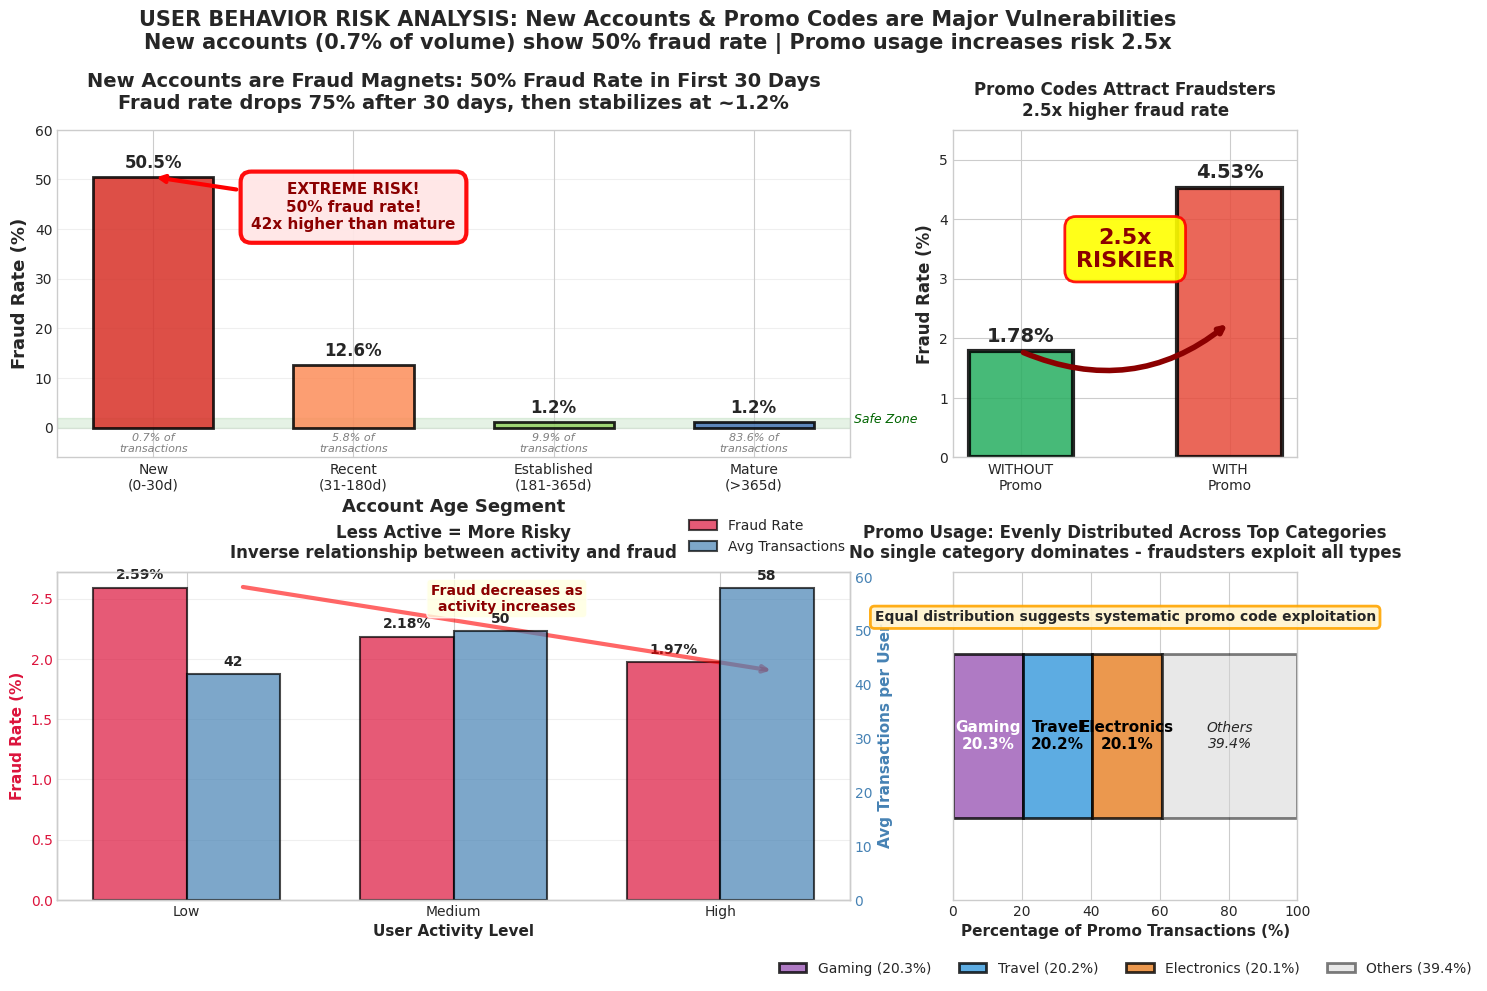

In [111]:
# @title

# Set style
sns.set_style("whitegrid")
fig = plt.figure(figsize=(16, 10))
gs = fig.add_gridspec(2, 3, hspace=0.35, wspace=0.3)

# Data
account_segments = ['New\n(0-30d)', 'Recent\n(31-180d)', 'Established\n(181-365d)', 'Mature\n(>365d)']
fraud_rates_account = [50.50, 12.59, 1.18, 1.20]
transaction_counts = [2081, 17512, 29614, 250488]
total_txns = sum(transaction_counts)
transaction_pcts = [t/total_txns*100 for t in transaction_counts]

activity_segments = ['Low', 'Medium', 'High']
activity_fraud_rates = [2.59, 2.18, 1.97]
activity_txn_counts = [61278, 158683, 79734]
activity_avg_txns = [42, 50, 58]

promo_yes_fraud = 4.53
promo_no_fraud = 1.78
promo_categories = ['Gaming', 'Travel', 'Electronics']
promo_percentages = [20.3, 20.2, 20.1]

# ========== 1. ACCOUNT AGE: DRAMATIC SPIKE IN NEW ACCOUNTS ==========
ax1 = fig.add_subplot(gs[0, :2])

# Create bar chart with dramatic color gradient
colors_age = ['#d73027', '#fc8d59', '#91cf60', '#4575b4']
bars = ax1.bar(account_segments, fraud_rates_account, color=colors_age,
               edgecolor='black', linewidth=2, width=0.6, alpha=0.85)

# Add value labels on bars
for i, (bar, rate, pct) in enumerate(zip(bars, fraud_rates_account, transaction_pcts)):
    height = bar.get_height()
    # Fraud rate on top
    ax1.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{rate:.1f}%', ha='center', va='bottom',
            fontsize=12, fontweight='bold')
    # Transaction volume below
    ax1.text(bar.get_x() + bar.get_width()/2., -1,
            f'{pct:.1f}% of\ntransactions', ha='center', va='top',
            fontsize=8, style='italic', color='gray')

# Add dramatic callout for new accounts
ax1.annotate('EXTREME RISK!\n50% fraud rate!\n42x higher than mature',
            xy=(0, 50.5), xytext=(1, 40),
            ha='center', fontsize=11, fontweight='bold', color='darkred',
            bbox=dict(boxstyle='round,pad=0.7', facecolor='#ffe6e6',
                     alpha=0.95, edgecolor='red', linewidth=3),
            arrowprops=dict(arrowstyle='->', color='red', lw=3))

# Add safe zone indicator
ax1.axhspan(0, 2, alpha=0.1, color='green', zorder=0)
ax1.text(3.5, 1, 'Safe Zone', fontsize=9, color='darkgreen', style='italic')

# Show the dramatic drop
for i in range(len(fraud_rates_account)-1):
    x1, y1 = i, fraud_rates_account[i]
    x2, y2 = i+1, fraud_rates_account[i+1]

ax1.set_ylabel('Fraud Rate (%)', fontsize=13, fontweight='bold')
ax1.set_xlabel('Account Age Segment', fontsize=13, fontweight='bold')
ax1.set_title('New Accounts are Fraud Magnets: 50% Fraud Rate in First 30 Days\n' +
              'Fraud rate drops 75% after 30 days, then stabilizes at ~1.2%',
              fontsize=14, fontweight='bold', pad=15)
ax1.set_ylim(-6, 60)
ax1.grid(axis='y', alpha=0.3)

# ========== 2. ACTIVITY LEVEL: INVERSE RELATIONSHIP ==========
ax2 = fig.add_subplot(gs[1, :2])

# Create dual-axis for better visualization
colors_activity = ['#e74c3c', '#f39c12', '#27ae60']
x = np.arange(len(activity_segments))
width = 0.35

# Bar chart for fraud rates
bars1 = ax2.bar(x - width/2, activity_fraud_rates, width,
                label='Fraud Rate', color='crimson', alpha=0.7,
                edgecolor='black', linewidth=1.5)

# Create secondary y-axis for average transactions
ax2b = ax2.twinx()
bars2 = ax2b.bar(x + width/2, activity_avg_txns, width,
                 label='Avg Transactions', color='steelblue', alpha=0.7,
                 edgecolor='black', linewidth=1.5)

# Add value labels
for bar, val in zip(bars1, activity_fraud_rates):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
            f'{val:.2f}%', ha='center', va='bottom', fontsize=10, fontweight='bold')

for bar, val in zip(bars2, activity_avg_txns):
    height = bar.get_height()
    ax2b.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{val}', ha='center', va='bottom', fontsize=10, fontweight='bold')

# Add trend arrow
ax2.annotate('', xy=(2.2, 1.9), xytext=(0.2, 2.6),
            arrowprops=dict(arrowstyle='->', color='red', lw=3, alpha=0.6))
ax2.text(1.2, 2.4, 'Fraud decreases as\nactivity increases',
         ha='center', fontsize=10, fontweight='bold', color='darkred',
         bbox=dict(boxstyle='round', facecolor='lightyellow', alpha=0.8))

ax2.set_xlabel('User Activity Level', fontsize=11, fontweight='bold')
ax2.set_ylabel('Fraud Rate (%)', fontsize=11, fontweight='bold', color='crimson')
ax2b.set_ylabel('Avg Transactions per User', fontsize=11, fontweight='bold', color='steelblue')
ax2.set_title('Less Active = More Risky\nInverse relationship between activity and fraud',
              fontsize=12, fontweight='bold', pad=10)
ax2.set_xticks(x)
ax2.set_xticklabels(activity_segments)
ax2.tick_params(axis='y', labelcolor='crimson')
ax2b.tick_params(axis='y', labelcolor='steelblue')

# Combine legends
h1, l1 = ax2.get_legend_handles_labels()
h2, l2 = ax2b.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc='upper right', bbox_to_anchor=(1.01, 1.2), framealpha=0.9)

ax2.grid(axis='y', alpha=0.3)
ax2b.grid(False)

# ========== 3. PROMO CODE RISK MULTIPLIER ==========
ax3 = fig.add_subplot(gs[0, 2])

# Visual comparison of fraud rates
categories = ['WITHOUT\nPromo', 'WITH\nPromo']
fraud_rates_promo = [promo_no_fraud, promo_yes_fraud]
colors_promo = ['#27ae60', '#e74c3c']

bars = ax3.bar(categories, fraud_rates_promo, color=colors_promo,
               alpha=0.85, edgecolor='black', linewidth=3, width=0.5)

# Add value labels
for bar, rate in zip(bars, fraud_rates_promo):
    height = bar.get_height()
    ax3.text(bar.get_x() + bar.get_width()/2., height + 0.1,
            f'{rate:.2f}%', ha='center', va='bottom',
            fontsize=14, fontweight='bold')

# Add multiplier annotation
ax3.annotate('', xy=(1, promo_yes_fraud/2), xytext=(0, promo_no_fraud),
            arrowprops=dict(arrowstyle='->', color='darkred', lw=4,
                          connectionstyle="arc3,rad=0.3"))
ax3.text(0.5, 3.2, '2.5x\nRISKIER', fontsize=16, fontweight='bold',
         color='darkred', ha='center',
         bbox=dict(boxstyle='round,pad=0.5', facecolor='yellow',
                  alpha=0.9, edgecolor='red', linewidth=2))

ax3.set_ylabel('Fraud Rate (%)', fontsize=12, fontweight='bold')
ax3.set_title('Promo Codes Attract Fraudsters\n2.5x higher fraud rate',
              fontsize=12, fontweight='bold', pad=10)


ax3.set_ylim(0, 5.5)



# ========== 4. PROMO USAGE BY CATEGORY ==========
ax4 = fig.add_subplot(gs[1, 2:])

# Create horizontal stacked bar to show even distribution
y = [0]
left = 0
colors_cat = ['#9b59b6', '#3498db', '#e67e22']

for i, (cat, pct, color) in enumerate(zip(promo_categories, promo_percentages, colors_cat)):
    ax4.barh(y, pct, left=left, height=0.5, color=color,
            alpha=0.8, edgecolor='black', linewidth=2,
            label=f'{cat} ({pct}%)')

    # Add category label in the middle of each section
    ax4.text(left + pct/2, 0, f'{cat}\n{pct}%',
            ha='center', va='center', fontsize=11, fontweight='bold',
            color='white' if i == 0 else 'black')
    left += pct

# Add remaining categories
remaining_pct = 100 - sum(promo_percentages)
ax4.barh(y, remaining_pct, left=left, height=0.5, color='lightgray',
        alpha=0.5, edgecolor='black', linewidth=2,
        label=f'Others ({remaining_pct:.1f}%)')
ax4.text(left + remaining_pct/2, 0, f'Others\n{remaining_pct:.1f}%',
        ha='center', va='center', fontsize=10, style='italic')

ax4.set_xlim(0, 100)
ax4.set_ylim(-0.5, 0.5)
ax4.set_xlabel('Percentage of Promo Transactions (%)', fontsize=11, fontweight='bold')
ax4.set_title('Promo Usage: Evenly Distributed Across Top Categories\n' +
              'No single category dominates - fraudsters exploit all types',
              fontsize=12, fontweight='bold', pad=10)
ax4.set_yticks([])
ax4.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, framealpha=0.9)

# Add insight annotation
ax4.text(50, 0.35, 'Equal distribution suggests systematic promo code exploitation',
         ha='center', fontsize=10, fontweight='bold',
         bbox=dict(boxstyle='round', facecolor='#fff3cd', alpha=0.9,
                  edgecolor='orange', linewidth=2))

# Main title
fig.suptitle('USER BEHAVIOR RISK ANALYSIS: New Accounts & Promo Codes are Major Vulnerabilities\n' +
             'New accounts (0.7% of volume) show 50% fraud rate | Promo usage increases risk 2.5x',
             fontsize=15, fontweight='bold', y=1)

plt.tight_layout()
plt.show()

<a name="conclusion"></a>

# 8. Conclusion

## 📊 Analysis Review

Analyzed **299,695 transactions** (Jan-Oct 2024) with **2.21% fraud rate** (6,612 fraudulent transactions). Investigation focused on identifying key fraud patterns and risk factors through transaction amounts, channels, security features, geographic patterns, and user behavior.

---

## 💡 Key Insights

### 1. **Layered Security is Crucial**
- Security features reduce fraud by **85-92%** individually
- Combined implementation achieves **31x fraud reduction** (18.08% → 0.58%)
- 6.2% of transactions without security account for **51.2% of all fraud**

### 2. **Cross-Border Transactions are the Primary Geographic Risk**
- **7.9x higher fraud rate** than domestic (11.28% vs 1.43%)
- Only 7.9% of volume but **40.5% of all fraud**
- Individual countries show minimal variation (1.67-2.80%)

### 3. **New Accounts are Extreme Risk**
- **50.5% fraud rate** in first 30 days (vs 1.2% for mature accounts)
- Represents only 0.7% of volume but disproportionate fraud impact
- Risk drops 75% after 30 days, then stabilizes

### 4. **Web Channel Vulnerability**
- **4.4x higher fraud rate** than app channel (3.56% vs 0.80%)
- Accounts for **82.1% of all fraud** despite 50.8% volume share
- Similar user behavior across channels suggests security implementation gaps

---

## 🎯 Business Recommendations

### **Immediate Actions**
1. **Enforce all 3 security features** for:
   - New accounts ($<$30 days old)
   - Cross-border transactions
   - Web channel transactions >$500

2. **Implement graduated trust system**:
   - Restrict promo codes for accounts $<$30 days
   - Lower transaction limits for new accounts
   - Increase limits based on successful transaction history

### **Strategic Initiatives**
1. **Apply app channel's security model to web** - Clear effectiveness gap
2. **Dynamic risk scoring** - Combine factors (new account + cross-border + promo = high risk)
3. **Real-time monitoring** for transactions with 2+ risk factors

---

## 🔬 Future Research Opportunities

1. **Temporal Analysis**: Fraud patterns by time of day, velocity detection
2. **Machine Learning**: Predictive models using identified risk factors
3. **Network Analysis**: Detect coordinated fraud rings exploiting promos
4. **ROI Analysis**: Cost-benefit of security features vs false positive rates

---

## 📝 Conclusion

This analysis reveals that **fraud concentrates in specific, identifiable patterns**. The combination of new accounts, cross-border transactions, and promo codes creates a perfect storm for fraud. However, existing security features prove highly effective when properly implemented. The path forward is clear: **enforce layered security on high-risk segments** while maintaining frictionless experience for established, low-risk users.

---

*Analysis by: Jinsol Kim*  
*Last Updated: 8th Novemberm 2025*    
*Dataset: [E-commerce Fraud Detection from Keggle](https://www.kaggle.com/datasets/umuttuygurr/e-commerce-fraud-detection-dataset/)*
